# 数据可视化

## 导入必要的包

In [1]:
#-*- coding : utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn
import seaborn as sns

## 导入数据文件

In [2]:
rootDir = r'E:\大学生活\比赛\服务外包\A09-科创-企业画像数据接口'
files = os.listdir(rootDir)
train_files = [i for i in files if 'train' in i]
test_files = [i for i in files if 'verify' in i]

In [3]:
train_files

['base_train_sum.csv',
 'knowledge_train_sum.csv',
 'money_report_train_sum.csv',
 'year_report_train_sum.csv']

In [4]:
base_dtype = {'ID':"Int64",'注册时间':"Int64",'注册资本':"Int64",'行业':object,
                    '区域':object,'企业类型':object,'控制人类型':object,'控制人持股比例':np.float64,'flag':"Int64"}
knowledge_dtype = "Int64"
money_report_dtype = {'ID':"Int64",'year':"Int64",'债权融资额度':np.float64,'债权融资成本':np.float64,
                            '股权融资额度':np.float64,'股权融资成本':np.float64,'内部融资和贸易融资额度':np.float64,
                           '内部融资和贸易融资成本':np.float64,'项目融资和政策融资额度':np.float64,'项目融资和政策融资成本':np.float64}
year_report_dtype = {'ID':"Int64",'year':"Int64",'从业人数':"Int64",'资产总额':np.float64,'负债总额':np.float64,'营业总收入':np.float64,
                    '主营业务收入':np.float64,'利润总额':np.float64,'净利润':np.float64,'纳税总额':np.float64,
                     '所有者权益合计':np.float64}

In [5]:
base_train = pd.read_csv(os.path.join(rootDir,train_files[0]),encoding='gbk',dtype=base_dtype)
knowledge_train = pd.read_csv(os.path.join(rootDir,train_files[1]),encoding='gbk',dtype=knowledge_dtype)
money_report_train = pd.read_csv(os.path.join(rootDir,train_files[2]),encoding='gbk',dtype=money_report_dtype)
year_report_train = pd.read_csv(os.path.join(rootDir,train_files[3]),encoding='gbk',dtype=year_report_dtype)

In [6]:
# 把第四个表中的“从业人数”属性转化为np.float64类型，方便后面处理
year_report_train['从业人数'] = year_report_train['从业人数'].astype(np.float64)
year_report_train.dtypes

ID           Int64
year         Int64
从业人数       float64
资产总额       float64
负债总额       float64
营业总收入      float64
主营业务收入     float64
利润总额       float64
净利润        float64
纳税总额       float64
所有者权益合计    float64
dtype: object

## 训练集数据可视化

In [7]:
def drawBarplot(x,y,xlabel,ylabel,title=""):
#     定义画条形图函数
    sns.barplot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for a,b in zip(x,y):
        plt.text(a,b,"%d"%b)
        
def drawCountplot(x,data,xlabel,ylabel,title=""):
    sns.countplot(x,data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
        
        
def drawDistplot(x,bins,xlabel="x",ylabel="y",title="",kde=True):
#     定义画直方图函数
    sns.distplot(x,bins=bins,kde=kde)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

### base_train_sum.csv

In [8]:
base_train_label = base_train.loc[:5072]
base_train_nolabel = base_train.loc[5073:]

#### 查看前五条数据

In [9]:
# 查看前五条数据
base_train.head()

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
0,28,2007,2050,交通运输业,福建,农民专业合作社,企业法人,NaN,1
1,230,2008,3360,服务业,广东,农民专业合作社,企业法人,1.00,1
2,429,2005,9670,工业,江西,集体所有制企业,自然人,0.75,1
3,693,2011,8360,社区服务,山东,股份有限公司,企业法人,0.98,1
4,727,2001,8720,零售业,江西,股份有限公司,企业法人,0.54,1


#### 统计信息

In [10]:
# 统计信息
base_train.describe(include="all")
# base_train_label.describe(include="all")

,ID,注册时间,注册资本,行业,区域,企业类型,控制人类型,控制人持股比例,flag
count,1.505000e+04,14879.000000,14909.000000,14907,14910,14905,14883,14911.000000,5073.0
unique,NaN,NaN,NaN,6,7,5,2,NaN,NaN
top,NaN,NaN,NaN,商业服务业,广西,农民专业合作社,自然人,NaN,NaN
freq,NaN,NaN,NaN,2550,2203,3043,7541,NaN,NaN
mean,3.527931e+06,2006.898515,5003.630693,NaN,NaN,NaN,NaN,0.755561,1.0
std,2.622221e+06,4.311774,2873.938399,NaN,NaN,NaN,NaN,0.144000,0.0
min,2.800000e+01,2000.000000,100.000000,NaN,NaN,NaN,NaN,0.510000,1.0
25%,8.036028e+05,2003.000000,2500.000000,NaN,NaN,NaN,NaN,0.630000,1.0
50%,5.970482e+06,2007.000000,4980.000000,NaN,NaN,NaN,NaN,0.760000,1.0
75%,5.974260e+06,2011.000000,7510.000000,NaN,NaN,NaN,NaN,0.880000,1.0


#### 查看缺失值个数

In [11]:
# 查看缺失值个数
base_train.isnull().sum()

ID            0
注册时间        171
注册资本        141
行业          143
区域          140
企业类型        145
控制人类型       167
控制人持股比例     139
flag       9977
dtype: int64

#### 观察离散类数据不同值的个数

In [12]:
# 观察离散类数据不同值的个数
for index in base_train.columns:
    if index != 'ID' and index != '注册资本':
        print(index+':')
        print (base_train[index].value_counts())
        print ('\n')

注册时间:
2008    1059
2001    1054
2002    1029
2007    1027
2005    1007
2000    1004
2003    1004
2006     974
2004     972
2013     971
2009     964
2010     964
2011     952
2014     952
2012     946
Name: 注册时间, dtype: int64


行业:
商业服务业    2550
社区服务     2493
服务业      2477
交通运输业    2475
工业       2457
零售业      2455
Name: 行业, dtype: int64


区域:
广西    2203
江西    2186
福建    2160
湖北    2117
山东    2109
广东    2072
湖南    2063
Name: 区域, dtype: int64


企业类型:
农民专业合作社    3043
有限责任公司     3022
股份有限公司     2985
集体所有制企业    2957
合伙企业       2898
Name: 企业类型, dtype: int64


控制人类型:
自然人     7541
企业法人    7342
Name: 控制人类型, dtype: int64


控制人持股比例:
0.73    351
0.54    331
0.80    328
0.98    323
0.81    323
0.93    321
0.57    318
0.85    318
0.91    315
0.62    315
0.83    314
0.52    312
0.75    311
0.72    310
0.63    308
0.53    306
0.82    304
0.84    304
0.92    304
0.87    303
0.68    301
0.59    299
1.00    298
0.94    298
0.76    298
0.56    297
0.66    295
0.67    295
0.89    294
0.86    294
0.90    29

#### 绘制离散变量的条形图

In [13]:
# 绘制离散变量的条形图
def drawCountplot_base_train(data):
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
    plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
    sns.set(font='SimHei')  # 解决Seaborn中文显示问题并调整字体大小
    sub = 0
    xlabels = ["Registration date","Industry","Region","Type of enterprise","Type of controlling person"]
    ylabels = ["Number"]*5
#     titles = ["Number of companies with patents","Number of companies with brands","Number of companies holding Copyrights"]
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    for column in data.columns:
        if column not in ["ID","注册资本","控制人持股比例","flag"]:
            plt.subplot(5,1,sub+1)
            drawCountplot(data[column],data,xlabels[sub],ylabels[sub])
            sub += 1

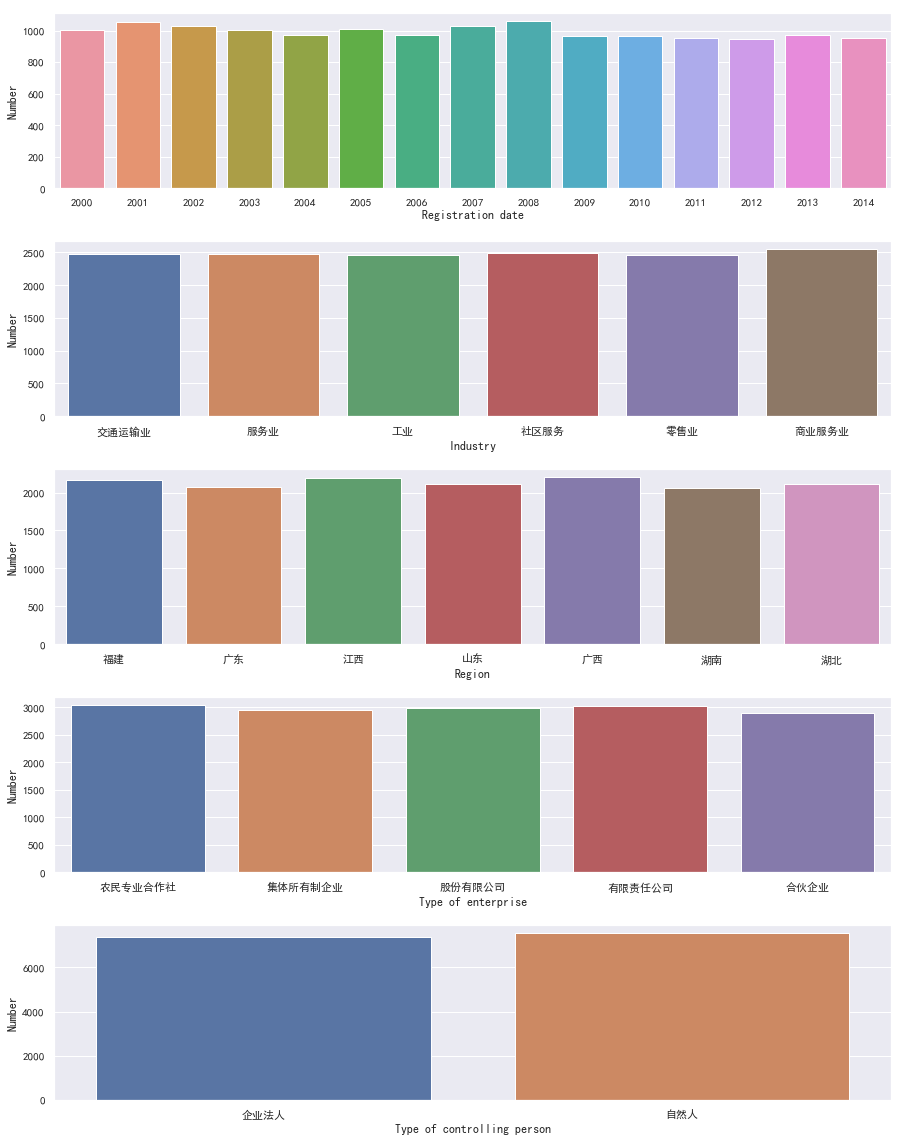

In [14]:
# 所有数据
drawCountplot_base_train(base_train)

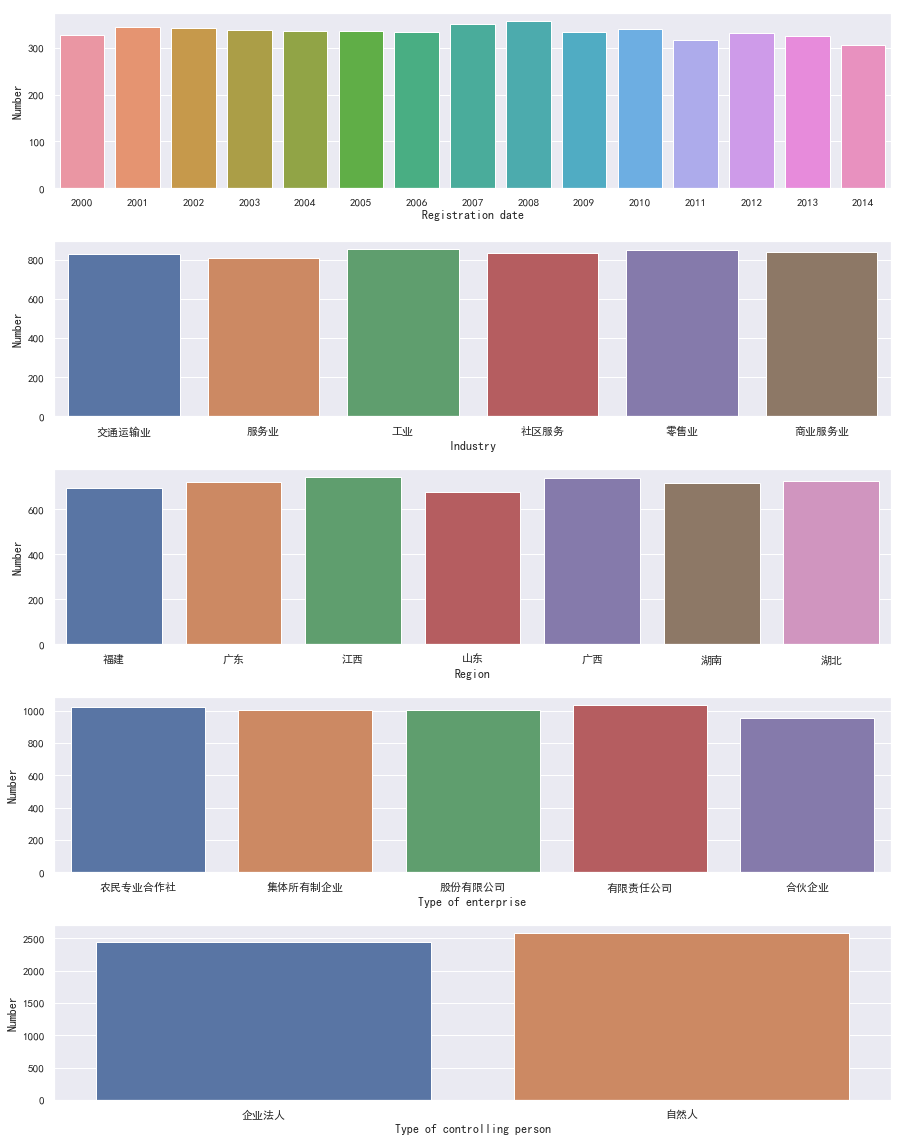

In [15]:
# 有标签数据
drawCountplot_base_train(base_train_label)

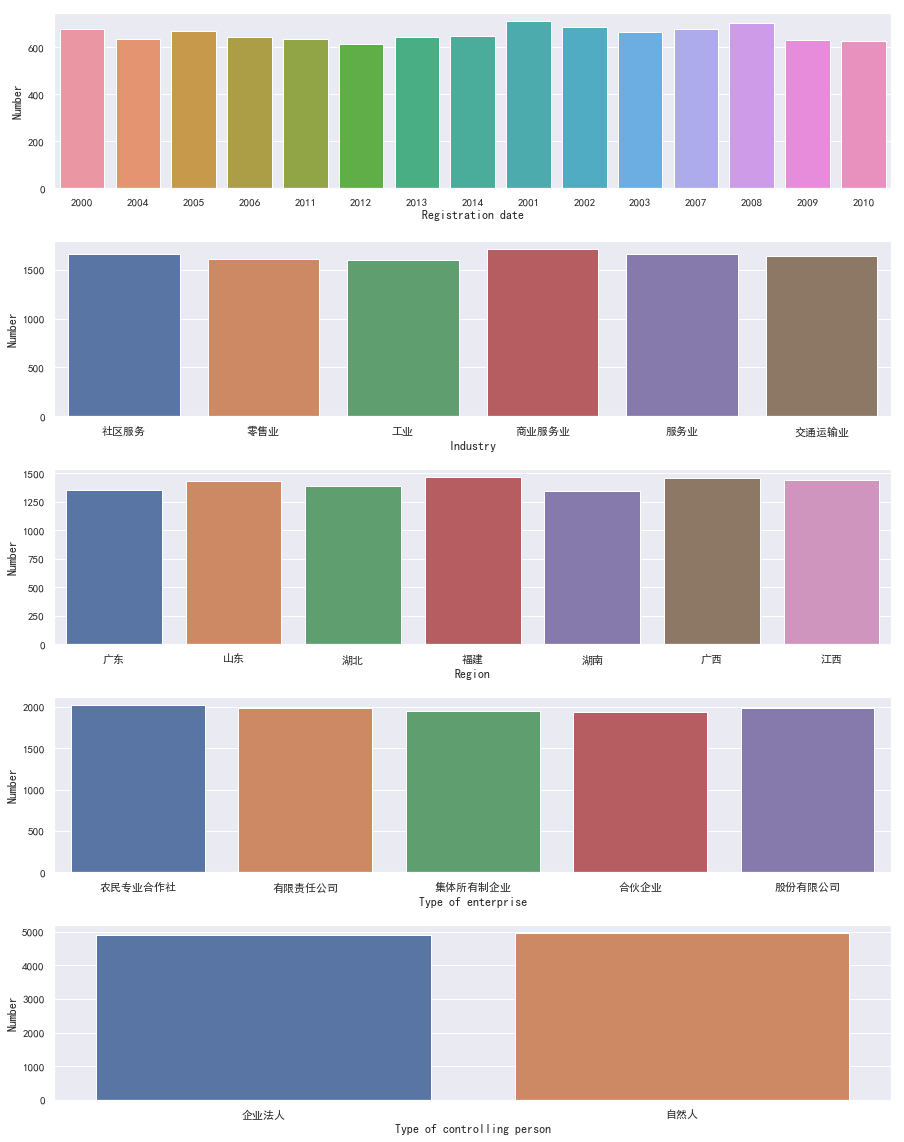

In [16]:
# 无标签数据
drawCountplot_base_train(base_train_nolabel)

#### 绘制连续变量的直方图

In [17]:
# 绘制连续变量的直方图
def drawDistplot_base_train(data):
    sub = 0
    xlabels = ["Registered capital","Shareholding ratio"]
    ylabels = ["Number"]*3
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    columns = ["注册资本","控制人持股比例"]
    for column in columns:
        x = data[column].dropna()
        if column == "注册资本":
            x = x.astype(np.int64)
        plt.subplot(1,2,sub+1)
        drawDistplot(x,10,xlabels[sub],ylabels[sub],kde=False)
        sub += 1

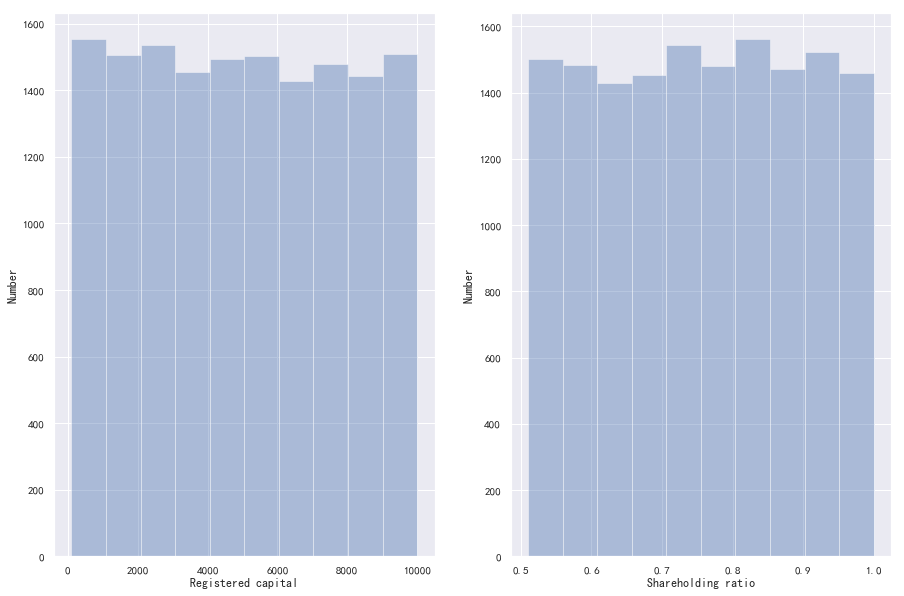

In [18]:
# 所有数据
drawDistplot_base_train(base_train)

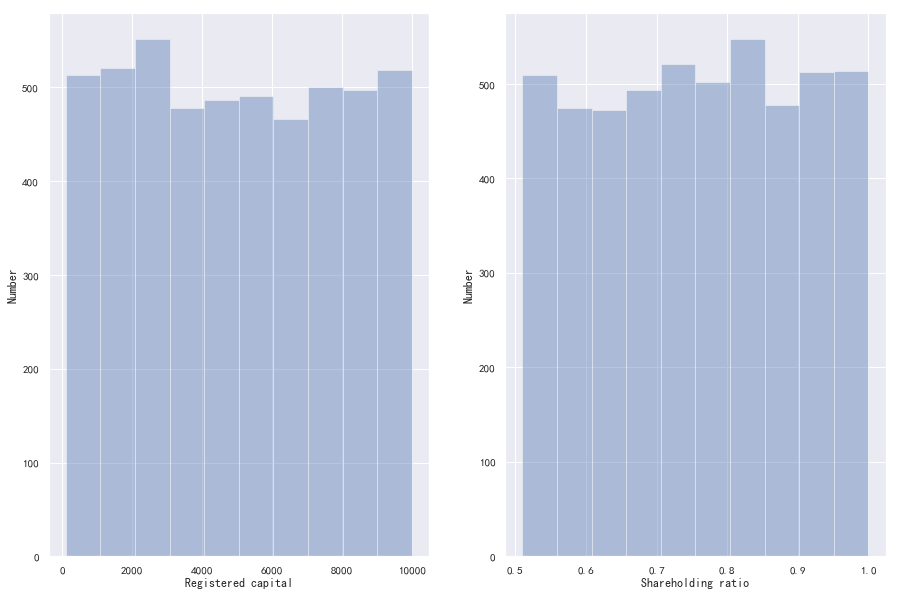

In [19]:
# 有标签数据
drawDistplot_base_train(base_train_label)

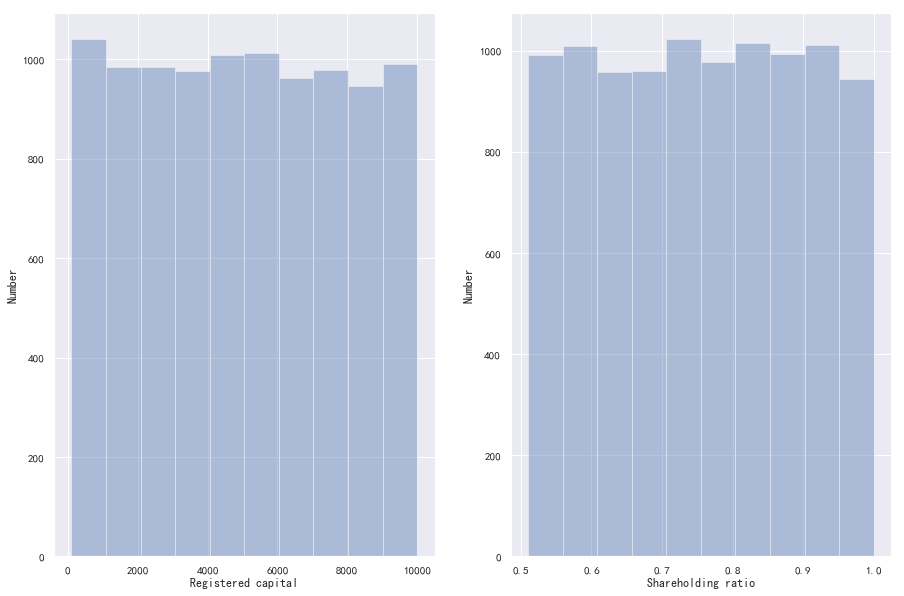

In [20]:
# 无标签数据
drawDistplot_base_train(base_train_nolabel)

#### 离散特征和flag的关系

<Figure size 1080x720 with 0 Axes>

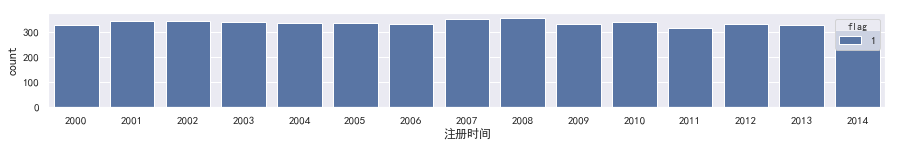

<Figure size 1080x720 with 0 Axes>

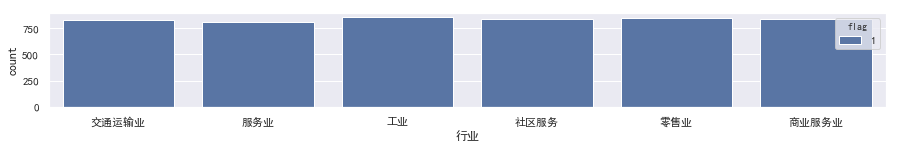

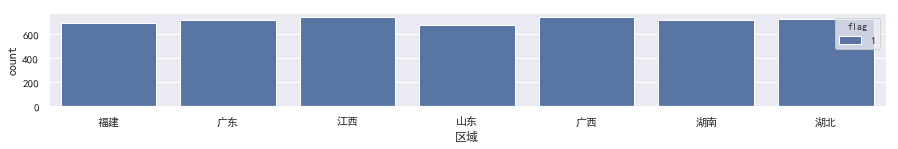

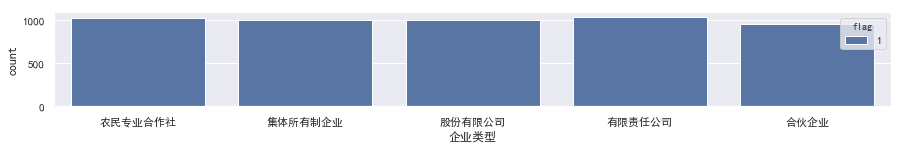

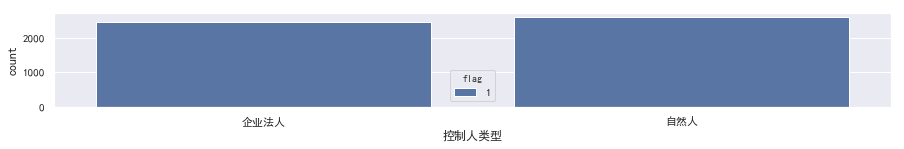

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [21]:
# sns.countplot('行业',data=base_train,hue="区域")
for column in base_train.columns:
    sub = 0
    plt.figure(figsize=(15,10))
    if column not in ['ID','注册资本','控制人持股比例','flag']:
        plt.subplot(5,1,sub+1)
        sns.countplot(column,data=base_train,hue="flag")     
        sub += 1

### knowledge_train_sum.csv

In [22]:
knowledge_train_label = knowledge_train[:5072]
knowledge_train_nolabel = knowledge_train[5073:]

#### 查看前五条数据

In [23]:
knowledge_train.head()

,ID,专利,商标,著作权
0,28,0,1,1
1,230,0,0,0
2,429,1,0,0
3,693,0,0,0
4,727,0,0,0


#### 统计信息

In [24]:
knowledge_train.describe()

,ID,专利,商标,著作权
count,1.505000e+04,14899.000000,14895.000000,14911.000000
mean,3.527931e+06,0.348480,0.356764,0.367447
std,2.622221e+06,0.476505,0.479060,0.482126
min,2.800000e+01,0.000000,0.000000,0.000000
25%,8.036028e+05,0.000000,0.000000,0.000000
50%,5.970482e+06,0.000000,0.000000,0.000000
75%,5.974260e+06,1.000000,1.000000,1.000000
max,5.978033e+06,1.000000,1.000000,1.000000


#### 查看缺失值个数

In [25]:
knowledge_train.isnull().sum()

ID       0
专利     151
商标     155
著作权    139
dtype: int64

#### 绘制各个特征的统计信息的条形图

In [26]:
# 绘制离散变量的条形图
def drawBarplot_knowledge_train(data):
    sub = 0
    xlabels = ["Patent","Brand","Copyright"]
    ylabels = ["Number"]*3
    titles = ["Number of companies with patents","Number of companies with brands","Number of companies holding Copyrights"]
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2,hspace=0.3)
    for column in data.columns:
        if column != 'ID':
            x = [0,1]
            y = [data[(data[column] ==0)].shape[0],data[(data[column] == 1)].shape[0]]
            plt.subplot(2,2,sub+1)
            drawBarplot(x,y,xlabels[sub],ylabels[sub],titles[sub])
            sub += 1
    plt.subplot(2,2,4)
    x = [0,1]
    y = [data[(data['专利'] == 0) | (data['商标'] == 0) | (data['著作权'] == 0)].shape[0],
        data[(data['专利'] == 1) & (data['商标'] == 1) & (data['著作权'] == 1)].shape[0]]
    drawBarplot(x,y,"All three","Number","Number of companies holding all three")

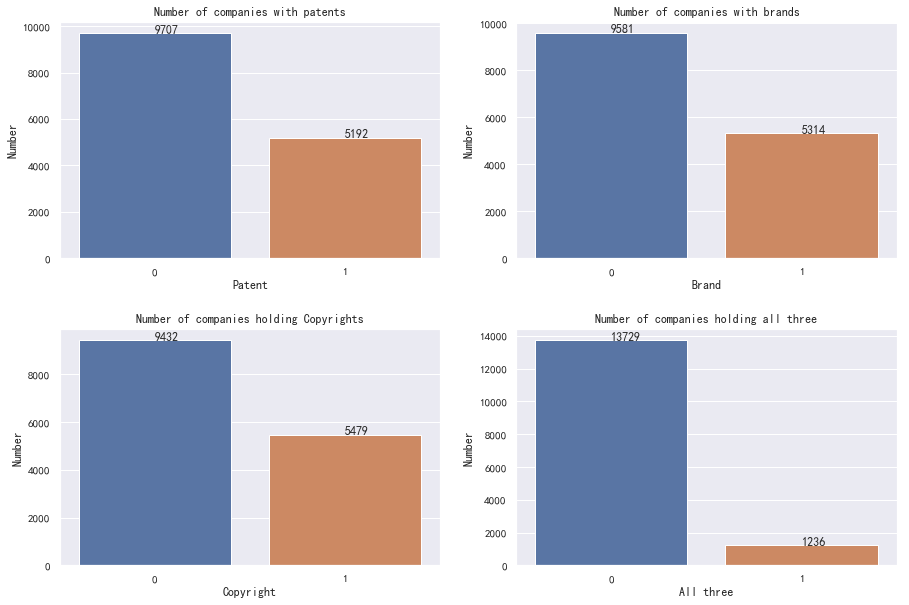

In [27]:
# 所有数据
drawBarplot_knowledge_train(knowledge_train)

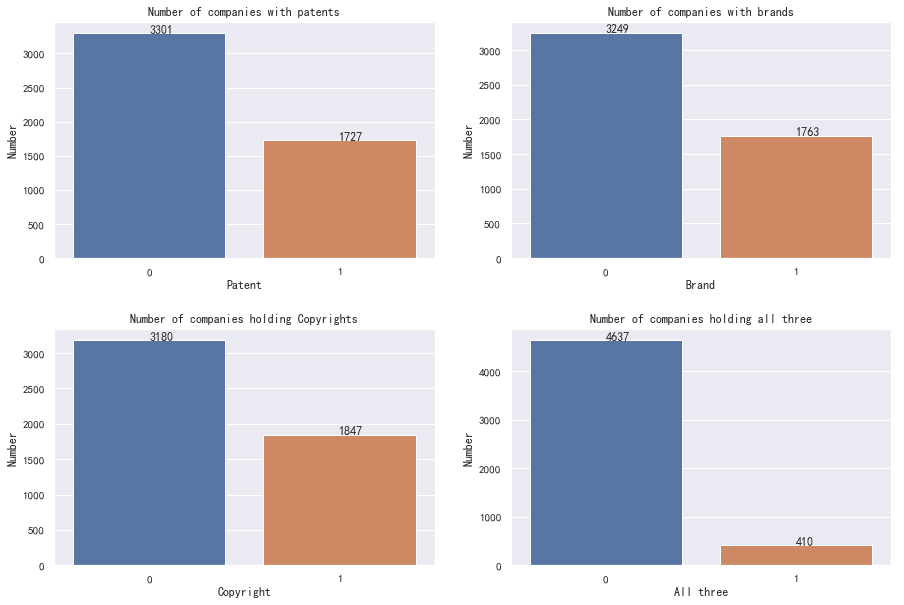

In [28]:
# 有标签数据
drawBarplot_knowledge_train(knowledge_train_label)

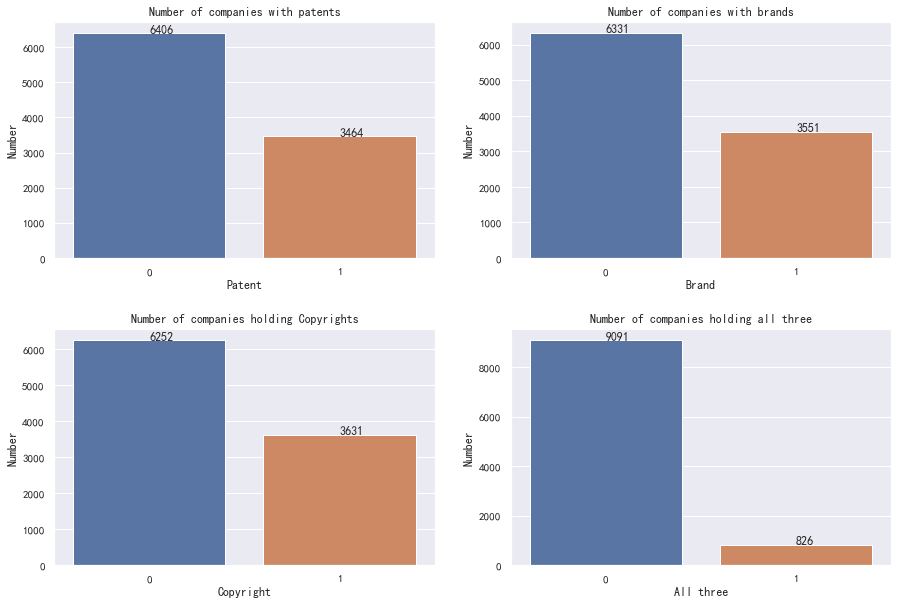

In [29]:
# 无标签数据
drawBarplot_knowledge_train(knowledge_train_nolabel)

### money_report_train_sum.csv

#### 查看前五条数据

In [30]:
money_report_train.head()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015,0.0,0.0,0.00,0.0000,21648.0,1298.88,0.0,0.000
1,230,2015,0.0,0.0,0.00,0.0000,0.0,0.00,470.4,28.224
2,429,2015,19340.0,1547.2,0.00,0.0000,0.0,0.00,0.0,0.000
3,693,2015,0.0,0.0,0.00,0.0000,0.0,0.00,5350.4,321.024
4,727,2015,0.0,0.0,32229.12,1289.1648,0.0,0.00,0.0,0.000


#### 统计信息

In [31]:
money_report_train.describe()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
count,4.515000e+04,44718.000000,44703.000000,44728.000000,44723.000000,44705.000000,4.469400e+04,44660.000000,44707.000000,44672.00000
mean,3.527927e+06,2016.000291,3324.894683,265.460206,5239.169778,209.089829,2.631515e+04,1577.002983,1036.692688,62.34379
std,2.622168e+06,0.816629,8898.356276,710.601447,18358.861041,732.923824,8.030627e+04,4813.302947,3049.402336,183.08944
min,2.800000e+01,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
25%,8.035730e+05,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
50%,5.970482e+06,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000
75%,5.974260e+06,2017.000000,0.000000,0.000000,0.000000,0.000000,5.532750e+02,28.080000,63.000000,3.91350
max,5.978033e+06,2017.000000,84745.000000,6779.600000,326340.000000,13053.600000,1.126080e+06,67564.800000,38930.000000,2335.80000


#### 查看缺失值个数

In [32]:
money_report_train.isnull().sum()

ID               0
year           432
债权融资额度         447
债权融资成本         422
股权融资额度         427
股权融资成本         445
内部融资和贸易融资额度    456
内部融资和贸易融资成本    490
项目融资和政策融资额度    443
项目融资和政策融资成本    478
dtype: int64

#### 根据公司ID查看信息

In [33]:
def getIdData(data):
    data_ID = data.groupby('ID')[data.columns].sum()
    data_ID = data_ID.drop(columns=['ID','year'])
    return data_ID

In [34]:
# money_report_train_ID = money_report_train.groupby("ID")[money_report_train.columns].sum()
# money_report_train_ID = money_report_train_ID.drop(columns=["ID","year"])
money_report_train_ID = getIdData(money_report_train)

In [35]:
money_report_train_ID.describe()

,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
count,15050.000000,15050.000000,15050.000000,15050.000000,1.505000e+04,15050.000000,15050.000000,15050.000000
mean,9875.931362,788.937148,15568.863120,621.087097,7.814813e+04,4679.664667,3079.562791,185.051281
std,16587.399397,1322.408237,33046.366701,1320.251315,1.475461e+05,8835.980608,5640.085951,338.207093
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,2062.500000,165.120000,1346.000000,53.197600,1.015560e+04,604.044000,563.750000,34.194000
75%,13123.750000,1050.560000,15536.970000,620.068800,8.850952e+04,5298.021000,3647.400000,220.320000
max,162884.000000,13030.720000,414108.800000,16564.352000,1.485264e+06,89115.840000,76486.000000,4589.160000


In [36]:
money_report_train_ID_label = money_report_train_ID.iloc[:5072]
money_report_train_ID_nolabel = money_report_train_ID.iloc[5073:]

In [37]:
money_report_train_ID['债权融资额度']

ID
28              0.0
230             0.0
429         19340.0
693             0.0
727             0.0
990             0.0
1137         9408.0
1274        42800.0
1560            0.0
1873            0.0
2260         6321.0
2694         1944.0
2992         2670.0
3261        17792.0
3313        42636.0
3537            0.0
3719            0.0
3720         3328.0
3742        21700.0
3770        23136.0
4107            0.0
4321        39792.0
4911       118610.0
5267          724.0
5646            0.0
6172            0.0
6357        23360.0
6370         5664.0
7662        31020.0
7706          522.0
             ...   
5978004     59640.0
5978005      3288.0
5978006      3306.0
5978007     43072.0
5978008     43129.0
5978009      3165.0
5978010      3000.0
5978011         0.0
5978012      9580.0
5978013      1644.0
5978014     24720.0
5978015         0.0
5978016         0.0
5978017      2100.0
5978018      9585.0
5978019     11349.0
5978020         0.0
5978021         0.0
5978022         0

In [38]:
def drawDistplot_ID(data):
    sub = 0
    xlabels = data.columns
    ylabels = ["Number"]*len(data.columns)
    plt.figure(figsize=(15,20))
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    for column in data.columns:
        x = data[column].dropna()
        plt.subplot(len(data.columns),1,sub+1)
        drawDistplot(x,5,xlabels[sub],ylabels[sub],kde=False)   
        sub += 1

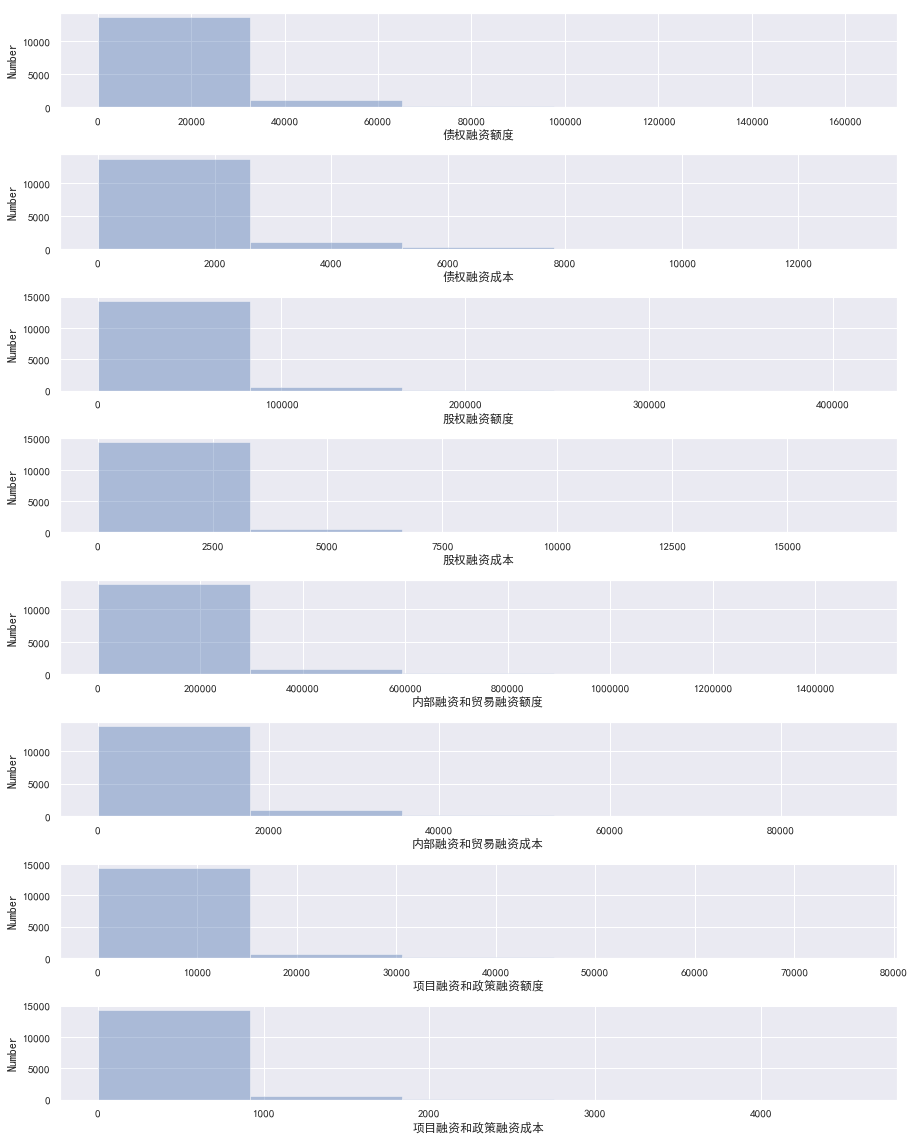

In [39]:
# 全部数据
drawDistplot_ID(money_report_train_ID)

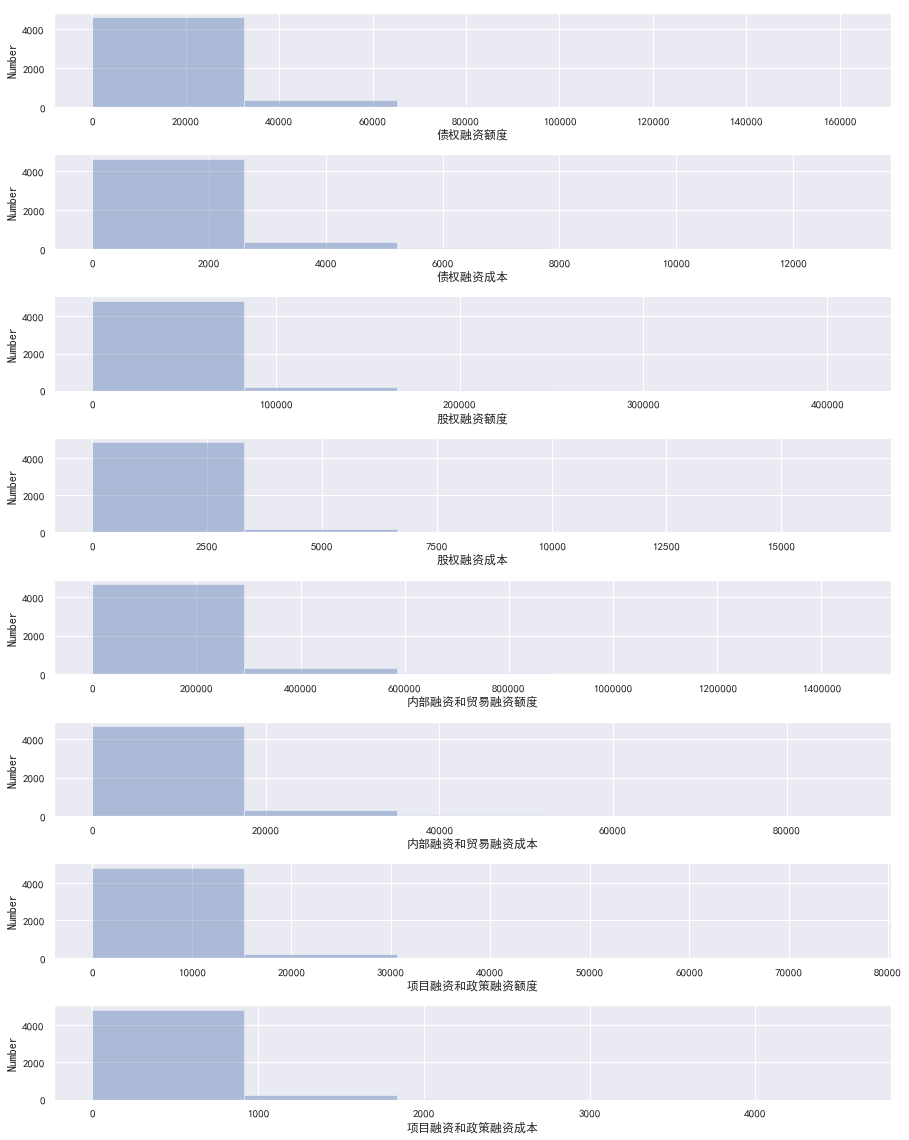

In [40]:
# 有标签数据
drawDistplot_ID(money_report_train_ID_label)

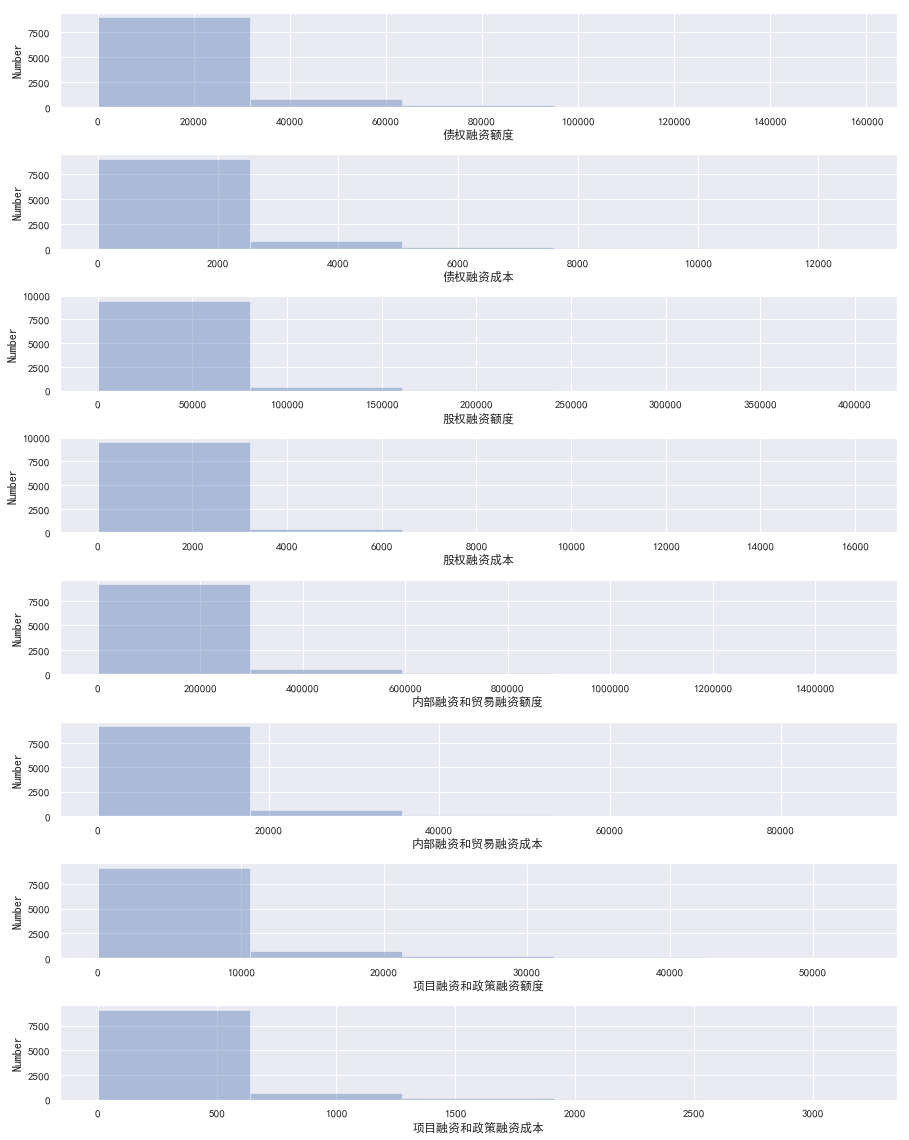

In [41]:
# 无标签数据
drawDistplot_ID(money_report_train_ID_nolabel)

#### 得到2015-2016和2016-2017财务增加数据

In [73]:
money_report_train.head()

,ID,year,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本
0,28,2015,0.0,0.0,0.00,0.0000,21648.0,1298.88,0.0,0.000
1,230,2015,0.0,0.0,0.00,0.0000,0.0,0.00,470.4,28.224
2,429,2015,19340.0,1547.2,0.00,0.0000,0.0,0.00,0.0,0.000
3,693,2015,0.0,0.0,0.00,0.0000,0.0,0.00,5350.4,321.024
4,727,2015,0.0,0.0,32229.12,1289.1648,0.0,0.00,0.0,0.000


In [86]:
def getData_15_16_17(data):
#     得到15，16，17年数据
    data_2015 = data[data.year == 2015]
    data_2016 = data[data.year == 2016]    
    data_2017 = data[data.year == 2017] 
    
    data_2015 = data_2015.set_index('ID',drop=False)
    data_2016 = data_2016.set_index('ID',drop=False)    
    data_2017 = data_2017.set_index('ID',drop=False)    
    return data_2015,data_2016,data_2017
    
def getDiffValue(past,present,prefix):
#     得到前后两年差值
    diff_value = present-past
    diff_value.drop(columns=['ID','year'],inplace=True)
    diff_value.rename(columns=lambda x:prefix+x+'差额',inplace=True)    # 给列名添加前缀prefix和后缀'差额'
    diff_value['ID'] = diff_value.index
    diff_value.index.name = 'id'
    return diff_value

def getUnionAll(data,data_ID):
#     将两张差额表和原始表连在一起得到新表
    data_2015,data_2016,data_2017 = getData_15_16_17(data)
    diff_value1 = getDiffValue(data_2015,data_2016,'2015-2016')
    diff_value2 = getDiffValue(data_2016,data_2017,'2016-2017')
    
    diff_value = pd.merge(diff_value1,diff_value2,on="ID")
    data_union_all = pd.merge(data_ID,diff_value,on="ID")
    return data_union_all

In [87]:
money_report_train_ID_diff_value = getUnionAll(money_report_train,money_report_train_ID)
money_report_train_ID_diff_value.head()

,ID,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本,2015-2016债权融资额度差额,...,2015-2016项目融资和政策融资额度差额,2015-2016项目融资和政策融资成本差额,2016-2017债权融资额度差额,2016-2017债权融资成本差额,2016-2017股权融资额度差额,2016-2017股权融资成本差额,2016-2017内部融资和贸易融资额度差额,2016-2017内部融资和贸易融资成本差额,2016-2017项目融资和政策融资额度差额,2016-2017项目融资和政策融资成本差额
0,28,0.0,0.0,38130.00,1525.2000,21648.0,1298.880,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,-31242.00,-1249.6800,0.0,0.000,0.0,0.0
1,230,0.0,0.0,3024.00,120.9600,46771.2,2806.272,470.4,28.224,0.0,...,-470.4,-28.224,0.0,0.0,3024.00,120.9600,-46771.2,-2806.272,0.0,0.0
2,429,19340.0,1547.2,105963.86,4238.5544,0.0,0.000,0.0,0.000,-19340.0,...,0.0,0.000,0.0,0.0,52778.86,2111.1544,0.0,0.000,0.0,0.0
3,693,0.0,0.0,32102.40,1284.0960,55176.0,3310.560,5350.4,321.024,0.0,...,-5350.4,-321.024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,727,0.0,0.0,132683.52,5307.3408,145188.0,8711.280,0.0,0.000,0.0,...,0.0,0.000,0.0,0.0,100454.40,4018.1760,-145188.0,-8711.280,0.0,0.0


In [48]:
# 看看怎么用
# money_report_train_groupby_ID_year = money_report_train.groupby(["ID","year"])[money_report_train.columns].sum()

#### 对所有数据画出直方图

In [53]:
money_report_train_ID_diff_value_label = money_report_train_ID_diff_value[:5072]
money_report_train_ID_diff_value_nolabel = money_report_train_ID_diff_value[5073:]

In [90]:
def drawDistplot_ID_diff_value(data,*no_use_column):
#     画出合并后的表的数据直方图
    plt_sum = len(data.columns)-len(no_use_column)
    sub = 0
    xlabels = list(set(list(data.columns))-set(no_use_column))
    ylabels = ["Number"]*plt_sum
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.2,hspace=0.2)
    for column in data.columns:
        if column not in no_use_column:
            plt.figure(sub+1)
            x = data[column]
            drawDistplot(x,10,xlabels[sub],ylabels[sub],kde=False)
            sub += 1

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


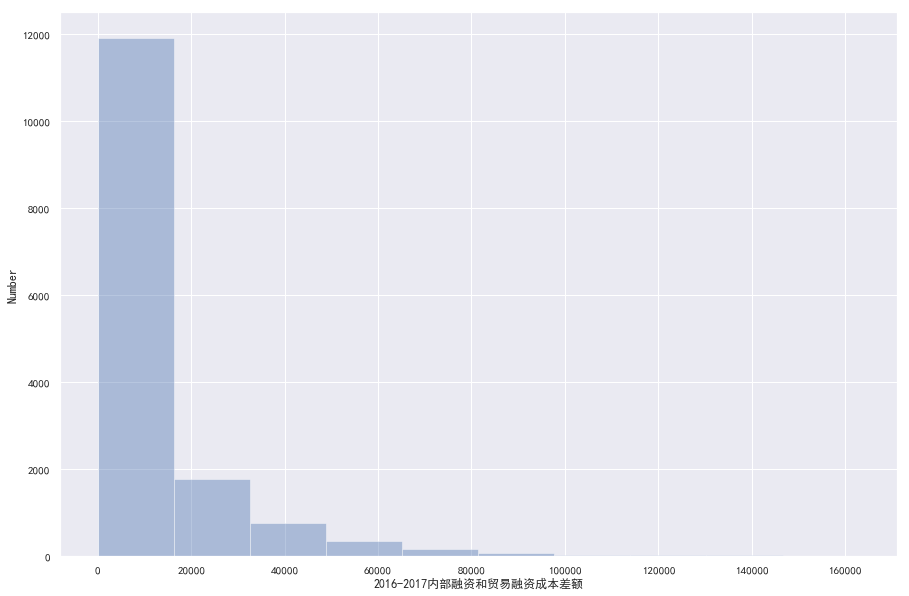

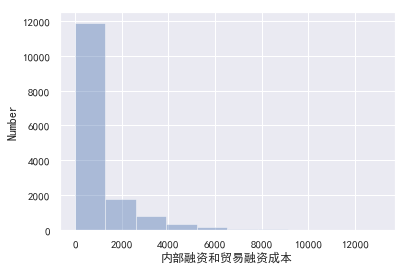

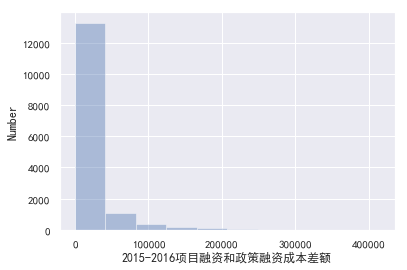

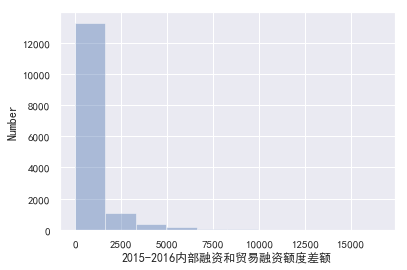

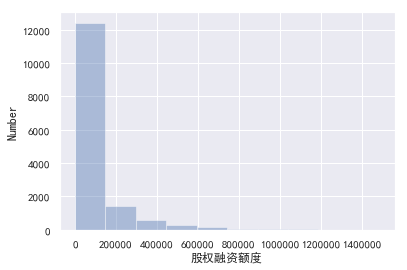

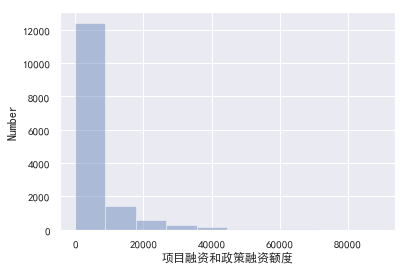

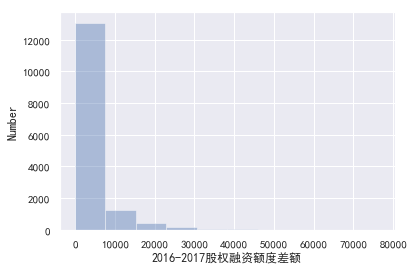

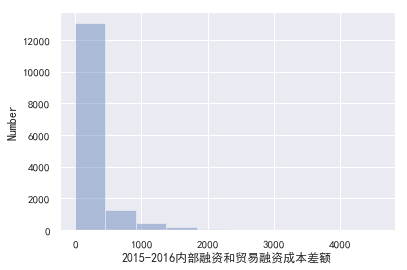

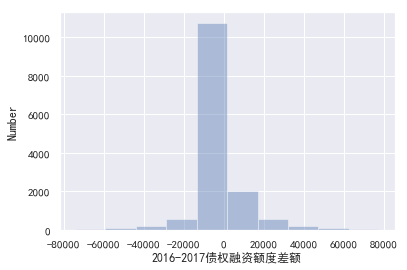

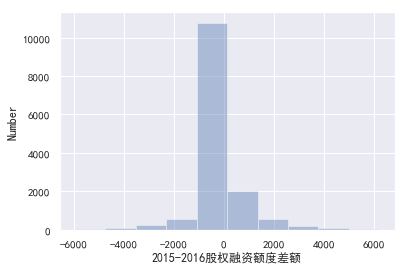

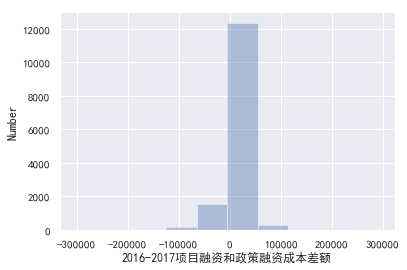

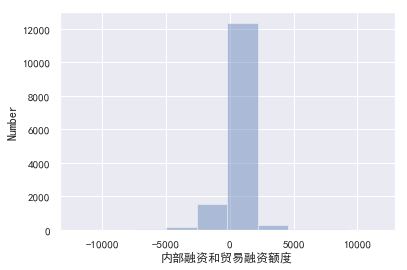

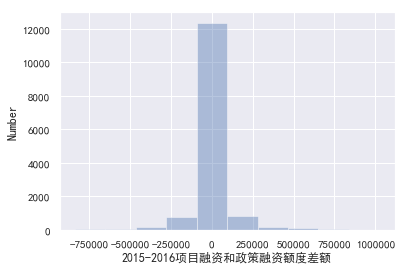

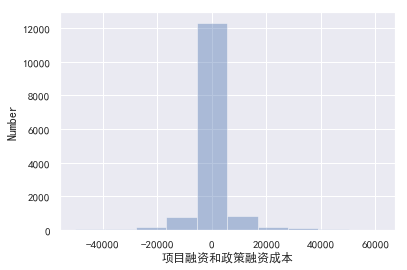

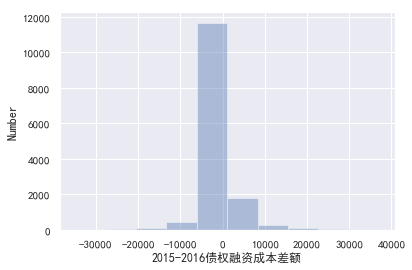

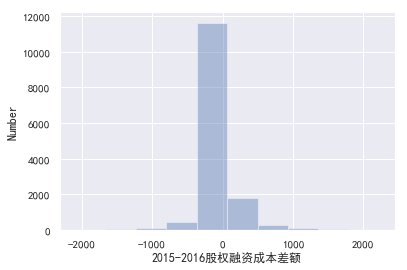

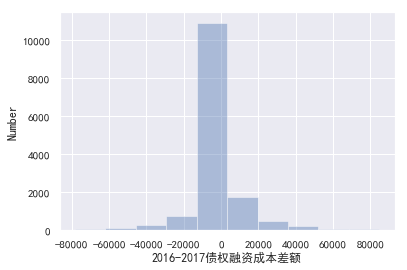

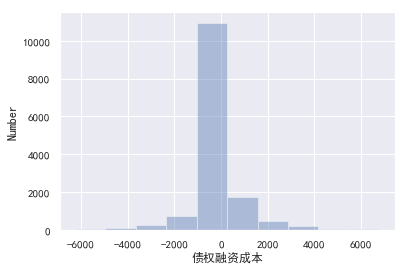

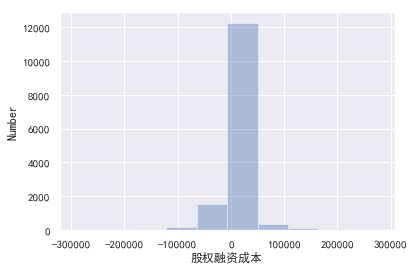

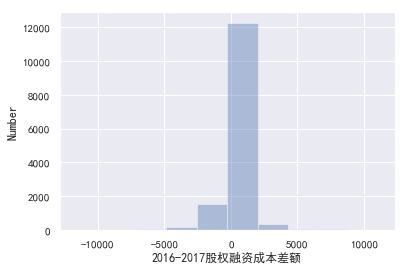

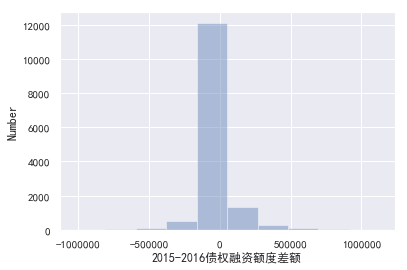

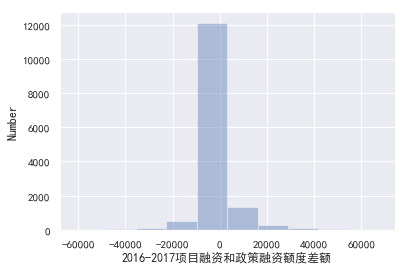

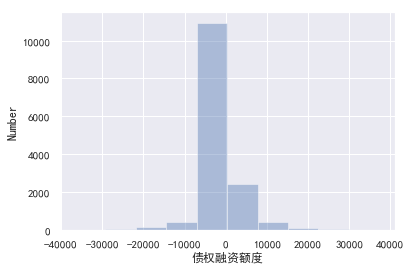

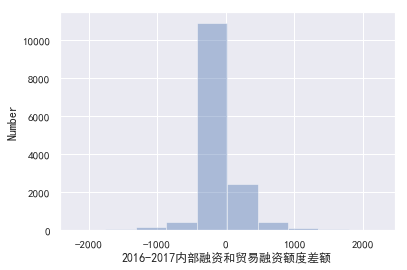

In [91]:
# 所有数据
drawDistplot_ID_diff_value(money_report_train_ID_diff_value,'ID')

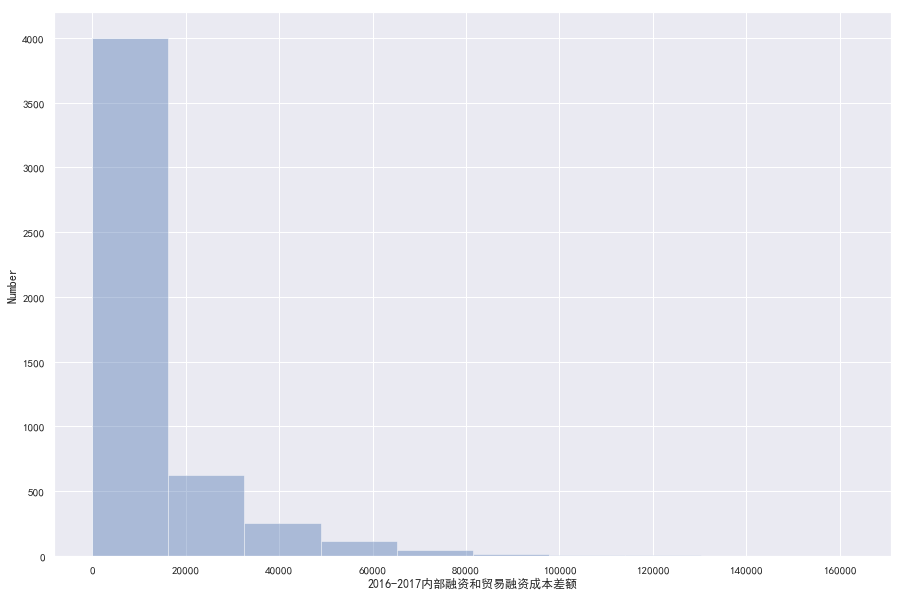

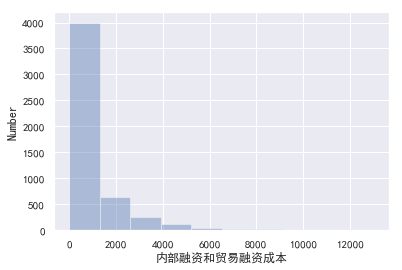

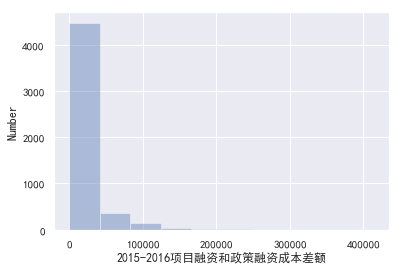

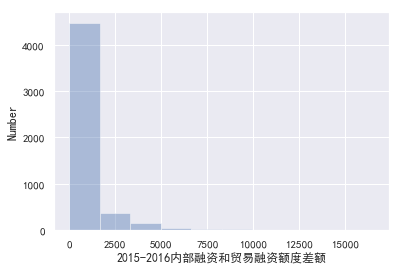

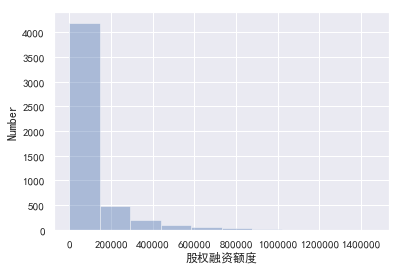

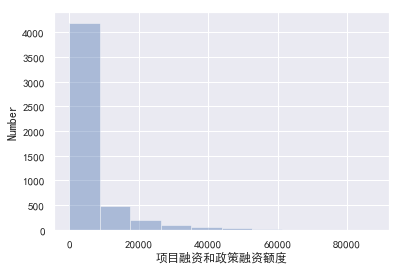

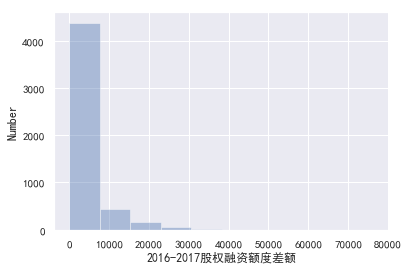

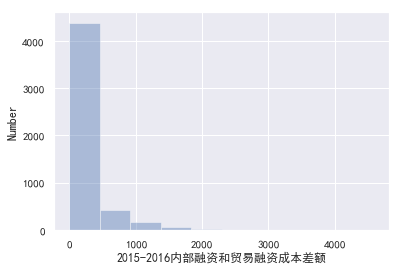

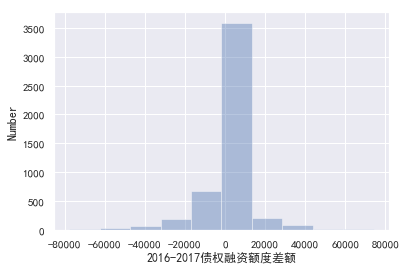

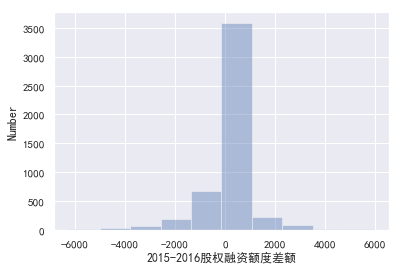

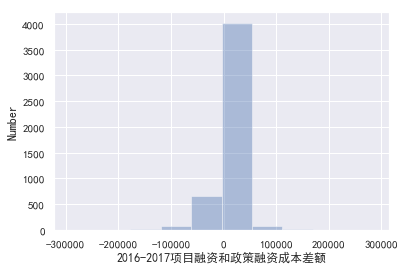

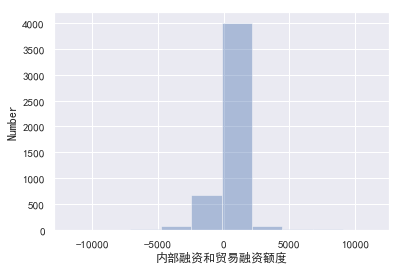

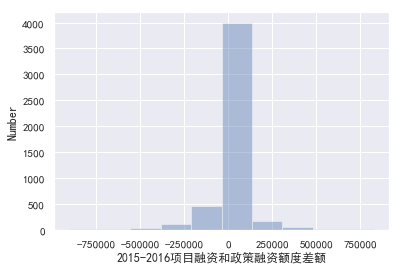

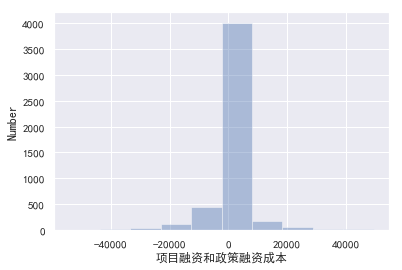

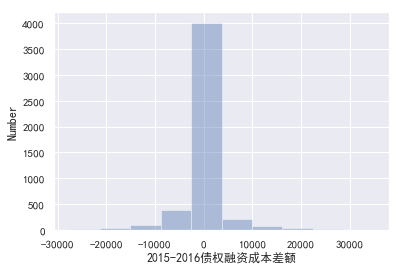

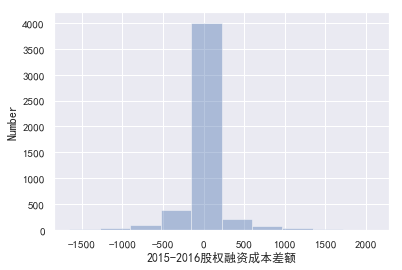

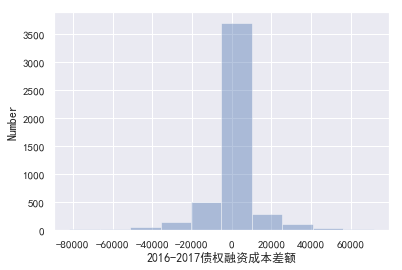

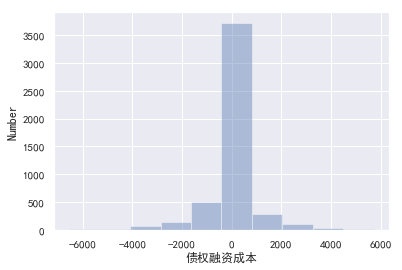

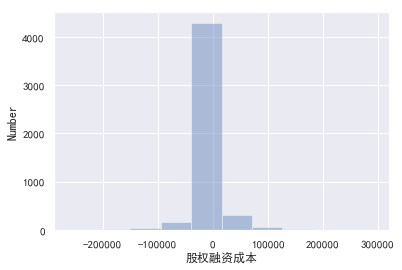

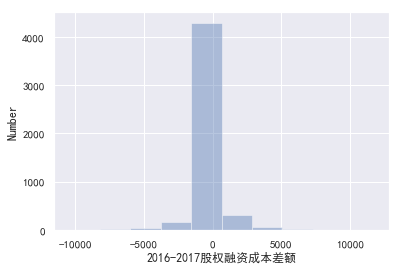

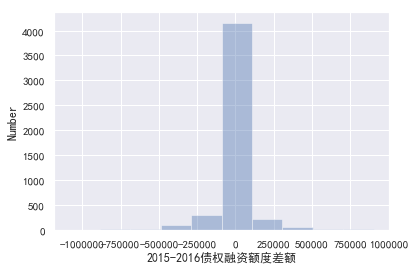

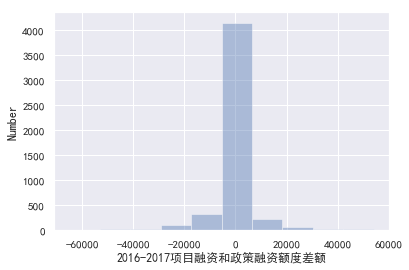

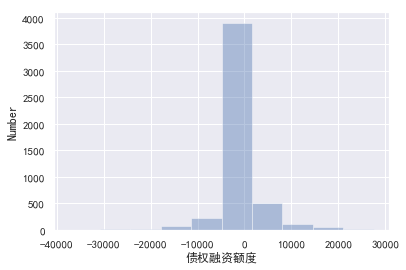

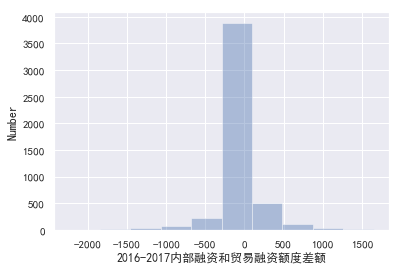

In [56]:
# 有标签数据
drawDistplot_ID_diff_value(money_report_train_ID_diff_value_label,'ID')

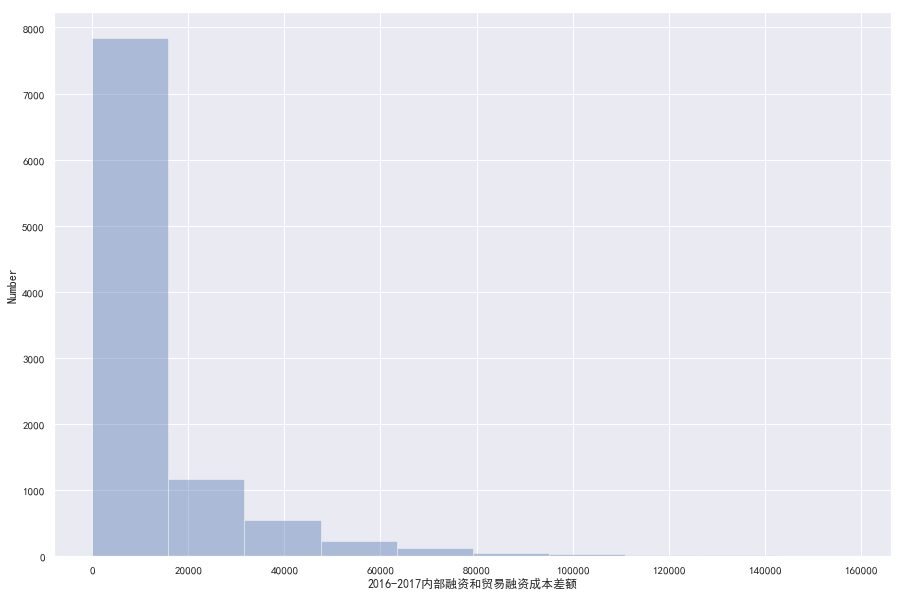

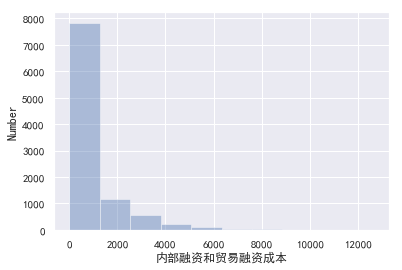

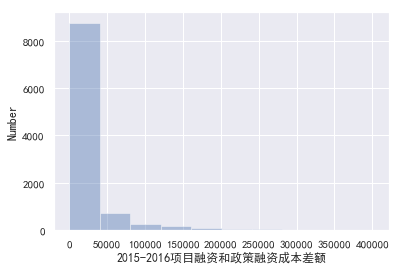

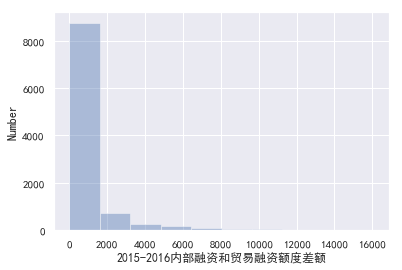

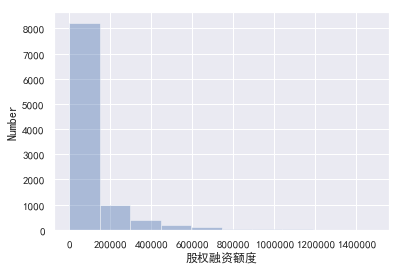

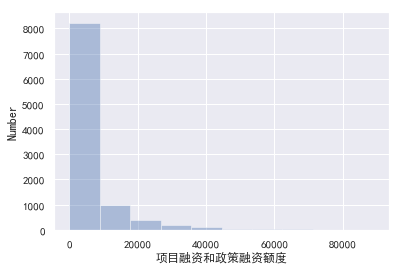

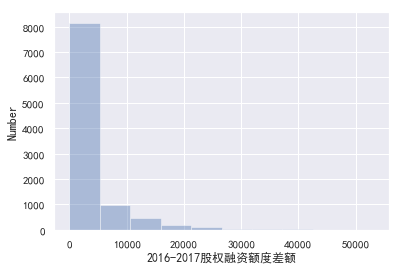

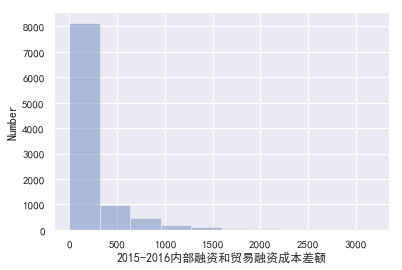

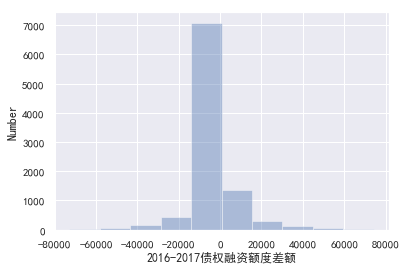

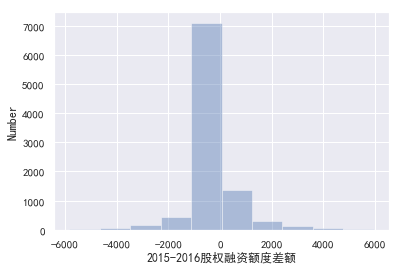

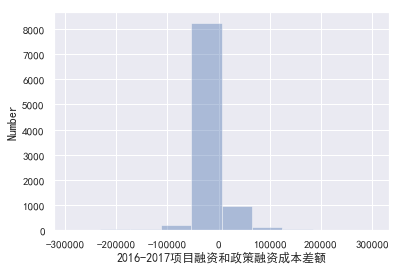

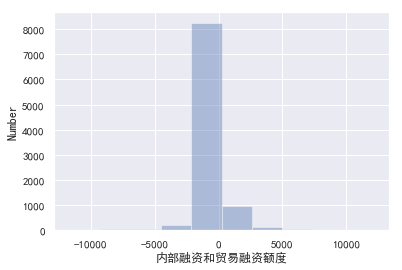

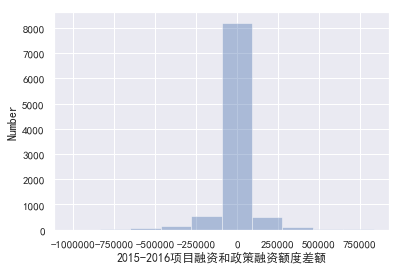

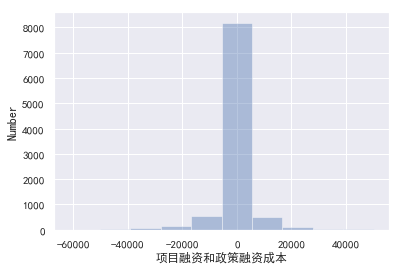

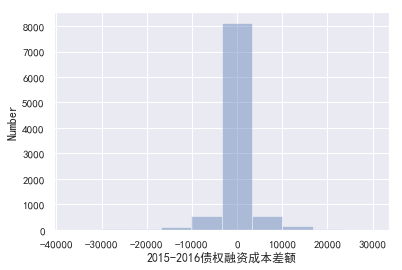

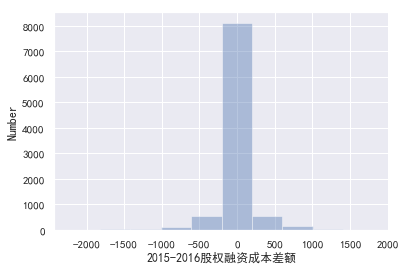

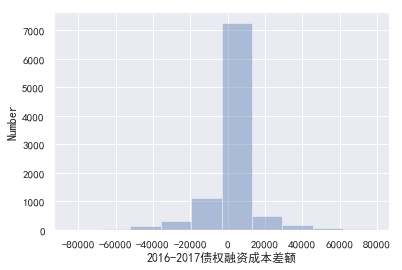

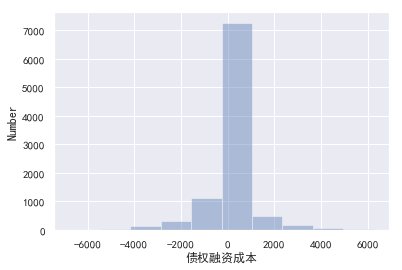

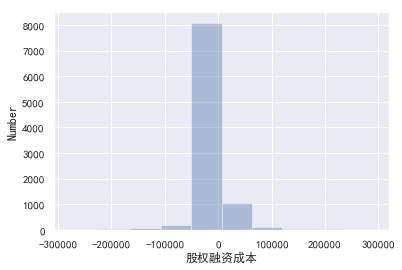

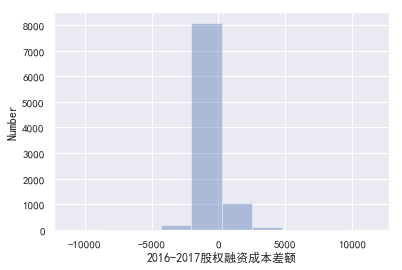

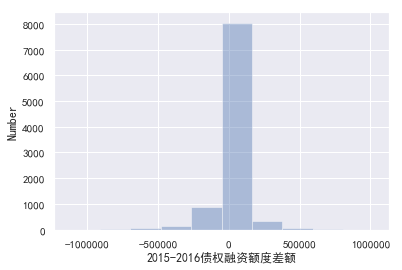

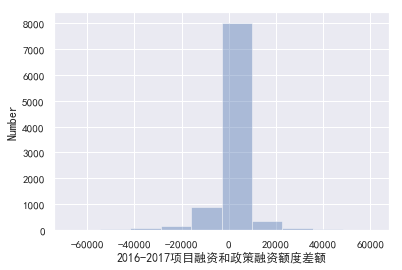

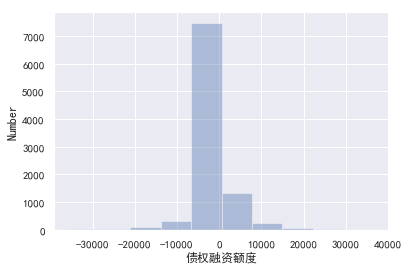

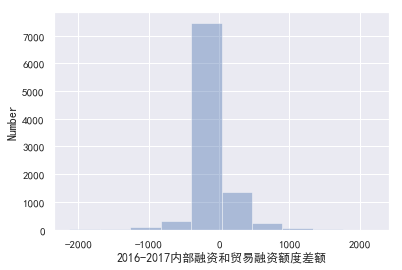

In [57]:
# 无标签数据
drawDistplot_ID_diff_value(money_report_train_ID_diff_value_nolabel,'ID')

In [58]:
money_report_train_ID_diff_value_label.describe()

,ID,债权融资额度,债权融资成本,股权融资额度,股权融资成本,内部融资和贸易融资额度,内部融资和贸易融资成本,项目融资和政策融资额度,项目融资和政策融资成本,2015-2016债权融资额度差额,...,2015-2016项目融资和政策融资额度差额,2015-2016项目融资和政策融资成本差额,2016-2017债权融资额度差额,2016-2017债权融资成本差额,2016-2017股权融资额度差额,2016-2017股权融资成本差额,2016-2017内部融资和贸易融资额度差额,2016-2017内部融资和贸易融资成本差额,2016-2017项目融资和政策融资额度差额,2016-2017项目融资和政策融资成本差额
count,5.072000e+03,5072.000000,5072.000000,5072.000000,5072.000000,5.072000e+03,5072.000000,5072.000000,5072.000000,4862.000000,...,4854.000000,4857.000000,4872.000000,4883.000000,4891.000000,4877.000000,4.885000e+03,4882.000000,4894.000000,4875.000000
mean,5.447862e+05,9788.425276,781.689748,15341.640355,613.550602,7.804882e+04,4684.427422,3171.261830,190.113203,-434.512752,...,-70.571261,-4.216151,-212.543103,-22.086750,-312.121378,-14.018403,-2.974532e+03,-214.518433,-86.809685,-6.084263
std,3.096976e+05,16217.502020,1295.392534,31678.035268,1270.658416,1.477725e+05,8841.514179,5773.820596,344.966635,11556.631083,...,4137.379050,248.528504,12637.346746,1004.090301,26092.108335,1042.279506,1.138829e+05,6801.760771,4258.671880,255.748137
min,2.800000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-77760.000000,...,-27560.000000,-1653.600000,-81770.000000,-6541.600000,-260492.800000,-10419.712000,-1.084438e+06,-65066.310000,-37312.500000,-2238.750000
25%,2.825205e+05,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,5.459075e+05,2128.500000,166.520000,1525.760000,61.322400,8.505000e+03,517.500000,621.400000,38.112000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,8.118455e+05,13408.500000,1070.640000,15835.720000,626.121600,8.825700e+04,5311.507500,3677.700000,222.015000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
max,1.079619e+06,162884.000000,13030.720000,414108.800000,16564.352000,1.461252e+06,87675.120000,76486.000000,4589.160000,74175.000000,...,34965.000000,2097.900000,71475.000000,5718.000000,293118.000000,11724.720000,9.030000e+05,54180.000000,27560.000000,1653.600000


### year_report_train_sum.csv

#### 查看前五条数据

In [59]:
year_report_train.head()

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
0,28,2015,794.0,16400.0,28700.0,72160.0,28864.0,7216.0,-7216.0,0.0,-12300.0
1,230,2015,485.0,23520.0,10080.0,115248.0,57624.0,57624.0,-11524.8,0.0,13440.0
2,429,2015,136.0,193400.0,183730.0,502840.0,351988.0,NaN,-50284.0,0.0,9670.0
3,693,2015,534.0,133760.0,125400.0,655424.0,262169.6,196627.2,-65542.4,0.0,8360.0
4,727,2015,375.0,366240.0,536280.0,402864.0,282004.8,161145.6,-40286.4,0.0,-170040.0


#### 统计信息

In [60]:
year_report_train.describe()

,ID,year,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
count,4.515000e+04,44699.000000,44722.000000,44687.000000,4.470500e+04,4.466300e+04,4.469900e+04,4.472100e+04,4.466600e+04,4.473300e+04,44721.000000
mean,3.527927e+06,2015.999597,508.690510,135728.099895,1.629924e+05,3.477351e+05,2.076636e+05,1.040043e+05,1.145571e+04,6.202478e+04,-27332.676371
std,2.622168e+06,0.816515,283.549683,136351.253755,1.975744e+05,4.452355e+05,2.761612e+05,1.549433e+05,1.001121e+05,1.508067e+05,109106.042382
min,2.800000e+01,2015.000000,20.000000,190.000000,0.000000e+00,1.000000e+02,3.000000e+01,2.040000e+01,-4.060875e+05,0.000000e+00,-818380.000000
25%,8.035730e+05,2015.000000,262.000000,36240.000000,3.304000e+04,5.837700e+04,3.334500e+04,1.398400e+04,-2.149830e+04,0.000000e+00,-53680.000000
50%,5.970482e+06,2016.000000,511.000000,89250.000000,9.129000e+04,1.785000e+05,1.034640e+05,4.573800e+04,-1.844850e+03,0.000000e+00,410.000000
75%,5.974260e+06,2017.000000,752.000000,190560.000000,2.154600e+05,4.567500e+05,2.694798e+05,1.271424e+05,1.567380e+04,5.052000e+04,8950.000000
max,5.978033e+06,2017.000000,1000.000000,847450.000000,1.656480e+06,4.060875e+06,2.791600e+06,1.807398e+06,1.495872e+06,2.252160e+06,419250.000000


#### 查看缺失值个数

In [61]:
year_report_train.isnull().sum()

ID           0
year       451
从业人数       428
资产总额       463
负债总额       445
营业总收入      487
主营业务收入     451
利润总额       429
净利润        484
纳税总额       417
所有者权益合计    429
dtype: int64

#### 根据公司ID查看信息

In [62]:
year_report_train_ID = getIdData(year_report_train)
year_report_train_ID.describe()

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
count,15050.000000,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04,1.505000e+04
mean,1511.605116,4.030087e+05,4.841577e+05,1.031953e+06,6.167677e+05,3.090483e+05,3.399871e+04,1.843558e+05,-8.121891e+04
std,494.058150,3.523499e+05,4.667230e+05,1.024864e+06,6.249238e+05,3.350942e+05,2.191159e+05,3.374818e+05,1.952174e+05
min,70.000000,8.800000e+02,6.050000e+02,2.156000e+03,1.440000e+03,2.450000e+02,-8.520235e+05,0.000000e+00,-1.577940e+06
25%,1169.000000,1.325625e+05,1.388525e+05,2.882925e+05,1.685635e+05,7.867480e+04,-6.790973e+04,0.000000e+00,-1.386725e+05
50%,1512.000000,3.001750e+05,3.361550e+05,7.003830e+05,4.130847e+05,1.973368e+05,-4.365600e+03,1.573200e+04,-3.081750e+04
75%,1858.000000,5.807025e+05,6.859388e+05,1.442094e+06,8.556135e+05,4.219455e+05,8.738713e+04,2.247696e+05,1.164000e+04
max,2912.000000,2.229750e+06,3.517500e+06,8.520235e+06,5.660507e+06,3.600663e+06,2.564860e+06,4.125728e+06,9.641800e+05


In [63]:
year_report_train_ID.head()

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
ID,,,,,,,,,
28,1583.0,172200.0,260350.0,591220.0,305614.0,197866.0,-59122.0,0.0,-88150.0
230,1442.0,228480.0,282240.0,301392.0,197467.2,119515.2,-30139.2,0.0,-53760.0
429,1346.0,1073370.0,1305450.0,3155321.0,1809837.2,529819.3,-315532.1,0.0,-232080.0
693,1660.0,275880.0,238260.0,1160368.0,482539.2,393923.2,-116036.8,0.0,37620.0
727,1831.0,1194640.0,1752720.0,3398184.0,1528528.8,711813.6,-339818.4,0.0,-558080.0


In [64]:
year_report_train_ID.head()

,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计
ID,,,,,,,,,
28,1583.0,172200.0,260350.0,591220.0,305614.0,197866.0,-59122.0,0.0,-88150.0
230,1442.0,228480.0,282240.0,301392.0,197467.2,119515.2,-30139.2,0.0,-53760.0
429,1346.0,1073370.0,1305450.0,3155321.0,1809837.2,529819.3,-315532.1,0.0,-232080.0
693,1660.0,275880.0,238260.0,1160368.0,482539.2,393923.2,-116036.8,0.0,37620.0
727,1831.0,1194640.0,1752720.0,3398184.0,1528528.8,711813.6,-339818.4,0.0,-558080.0


In [65]:
year_report_train_ID_label = year_report_train_ID[:5072]
year_report_train_ID_nolabel = year_report_train_ID[5073:]

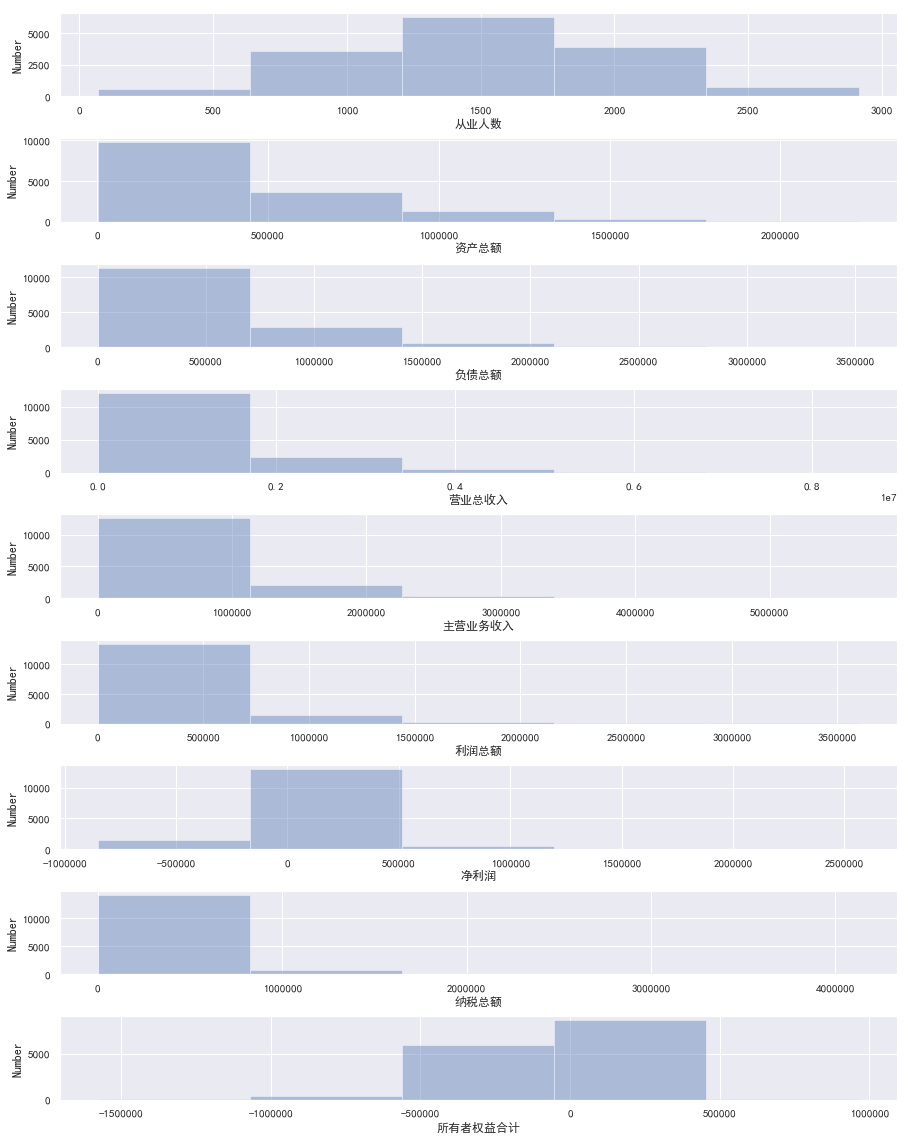

In [66]:
# 所有数据
drawDistplot_ID(year_report_train_ID)
# sns.distplot(year_report_train_ID['从业人数'],10)
# year_report_train_ID.dtypes

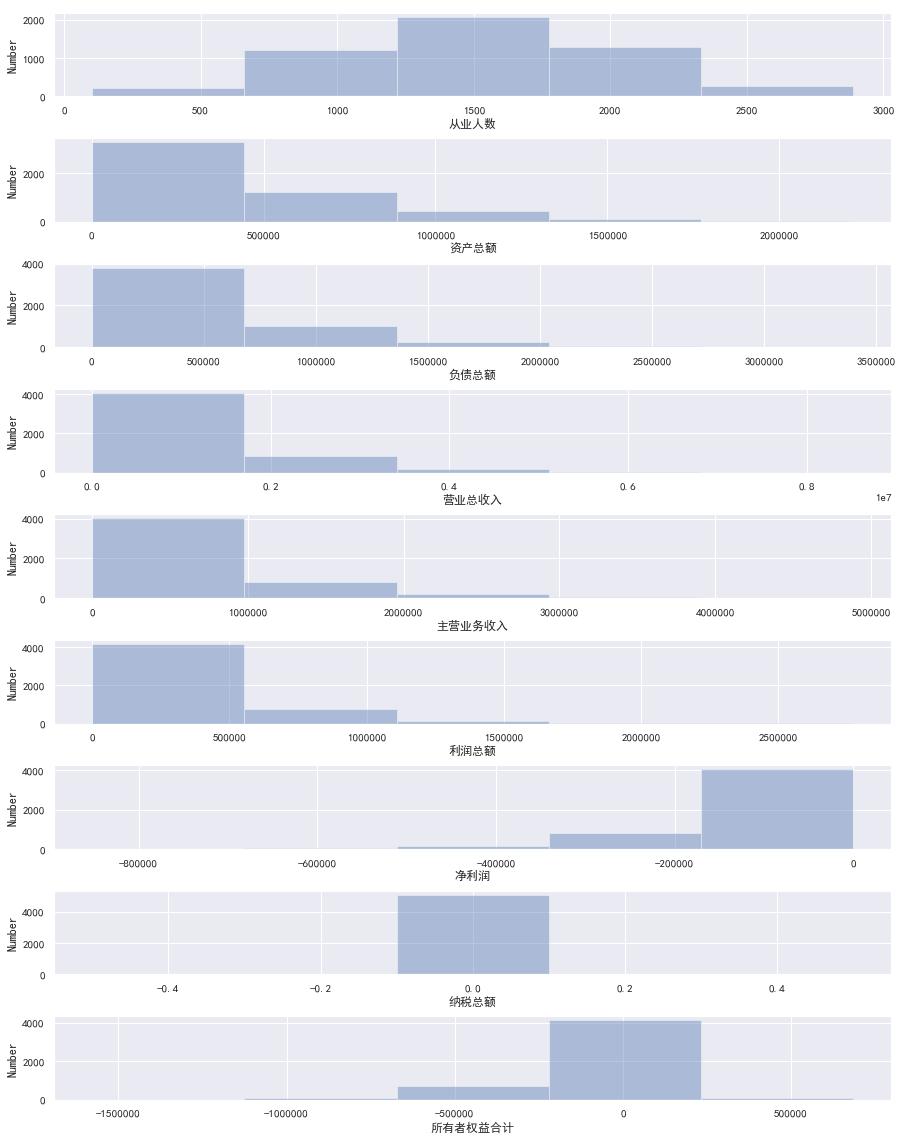

In [67]:
# 有标签数据
drawDistplot_ID(year_report_train_ID_label)

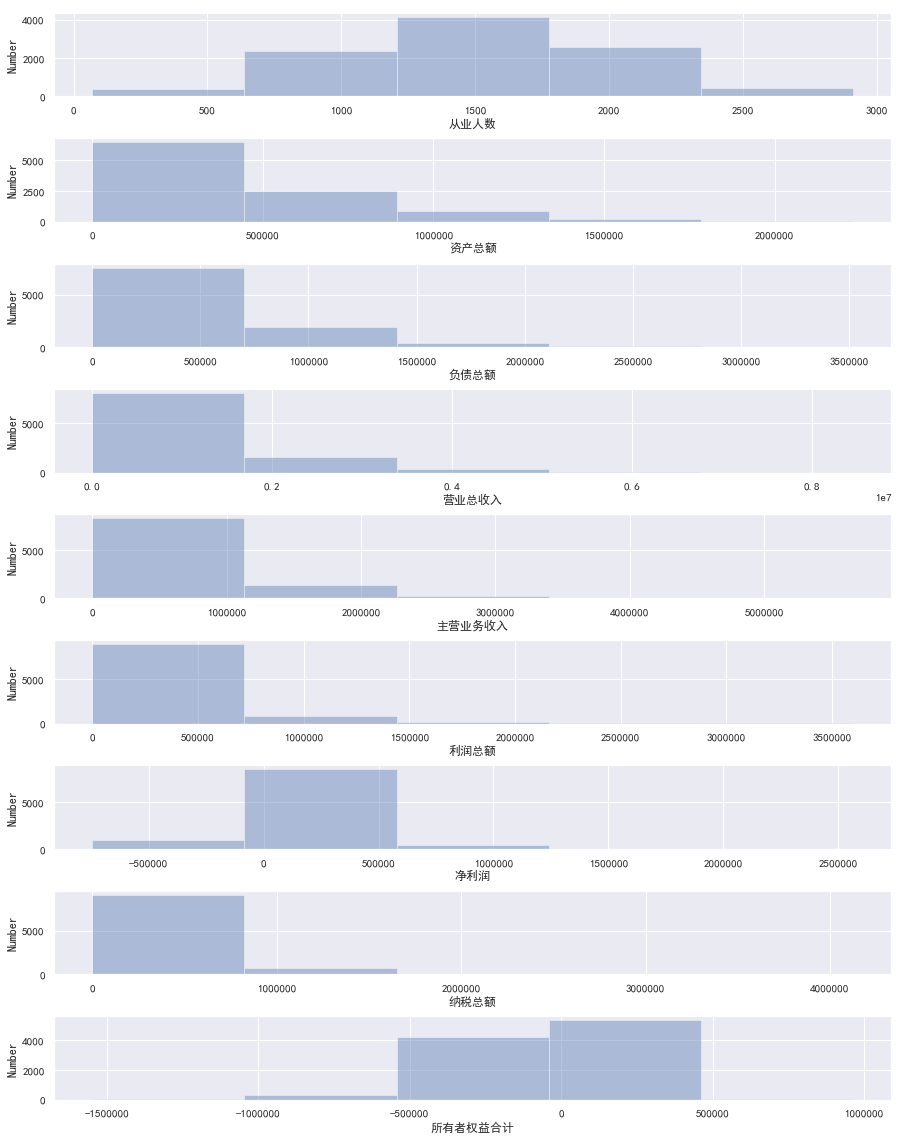

In [68]:
# 无标签数据
drawDistplot_ID(year_report_train_ID_nolabel)

#### 得到2015-2016和2016-2017财务增加数据

In [88]:
year_report_train_ID_diff_value = getUnionAll(year_report_train,year_report_train_ID)
year_report_train_ID_diff_value.head()

,ID,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,...,2015-2016所有者权益合计差额,2016-2017从业人数差额,2016-2017资产总额差额,2016-2017负债总额差额,2016-2017营业总收入差额,2016-2017主营业务收入差额,2016-2017利润总额差额,2016-2017净利润差额,2016-2017纳税总额差额,2016-2017所有者权益合计差额
0,28,1583.0,172200.0,260350.0,591220.0,305614.0,197866.0,-59122.0,0.0,-88150.0,...,14350.0,-3.0,8200.0,88150.0,-174660.0,-70110.0,-156210.0,17466.0,0.0,-79950.0
1,230,1442.0,228480.0,282240.0,301392.0,197467.2,119515.2,-30139.2,0.0,-53760.0,...,-10080.0,227.0,97440.0,171360.0,-125664.0,-109603.2,-31651.2,12566.4,0.0,-73920.0
2,429,1346.0,1073370.0,1305450.0,3155321.0,1809837.2,529819.3,-315532.1,0.0,-232080.0,...,-261090.0,-146.0,-183730.0,-444820.0,-6769.0,394149.2,263894.3,676.9,0.0,261090.0
3,693,1660.0,275880.0,238260.0,1160368.0,482539.2,393923.2,-116036.8,0.0,37620.0,...,-33440.0,394.0,58520.0,-20900.0,137104.0,36449.6,123728.0,-13710.4,0.0,79420.0
4,727,1831.0,1194640.0,1752720.0,3398184.0,1528528.8,711813.6,-339818.4,0.0,-558080.0,...,117720.0,-288.0,566800.0,850200.0,2027400.0,762564.0,453876.0,-202740.0,0.0,-283400.0


#### 对所有数据画出直方图

In [89]:
year_report_train_ID_diff_value_label = year_report_train_ID_diff_value[:5072]
year_report_train_ID_diff_value_nolabel = year_report_train_ID_diff_value[5073:]

In [93]:
year_report_train_ID_diff_value_label.head()

,ID,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,...,2015-2016所有者权益合计差额,2016-2017从业人数差额,2016-2017资产总额差额,2016-2017负债总额差额,2016-2017营业总收入差额,2016-2017主营业务收入差额,2016-2017利润总额差额,2016-2017净利润差额,2016-2017纳税总额差额,2016-2017所有者权益合计差额
0,28,1583.0,172200.0,260350.0,591220.0,305614.0,197866.0,-59122.0,0.0,-88150.0,...,14350.0,-3.0,8200.0,88150.0,-174660.0,-70110.0,-156210.0,17466.0,0.0,-79950.0
1,230,1442.0,228480.0,282240.0,301392.0,197467.2,119515.2,-30139.2,0.0,-53760.0,...,-10080.0,227.0,97440.0,171360.0,-125664.0,-109603.2,-31651.2,12566.4,0.0,-73920.0
2,429,1346.0,1073370.0,1305450.0,3155321.0,1809837.2,529819.3,-315532.1,0.0,-232080.0,...,-261090.0,-146.0,-183730.0,-444820.0,-6769.0,394149.2,263894.3,676.9,0.0,261090.0
3,693,1660.0,275880.0,238260.0,1160368.0,482539.2,393923.2,-116036.8,0.0,37620.0,...,-33440.0,394.0,58520.0,-20900.0,137104.0,36449.6,123728.0,-13710.4,0.0,79420.0
4,727,1831.0,1194640.0,1752720.0,3398184.0,1528528.8,711813.6,-339818.4,0.0,-558080.0,...,117720.0,-288.0,566800.0,850200.0,2027400.0,762564.0,453876.0,-202740.0,0.0,-283400.0


D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


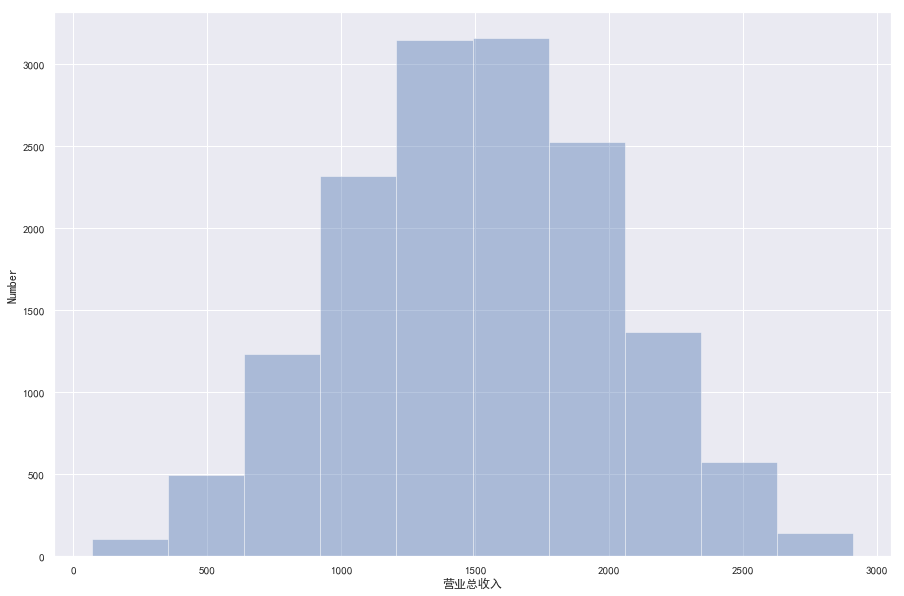

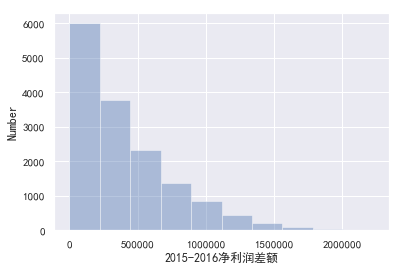

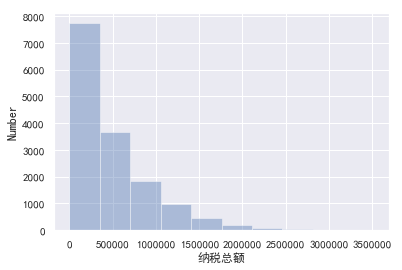

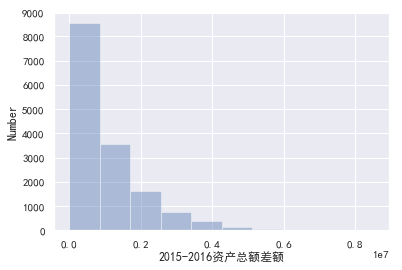

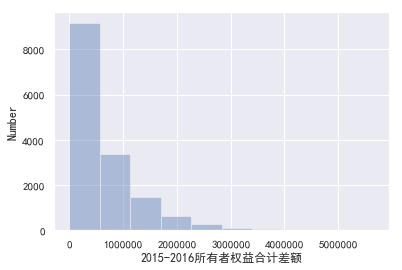

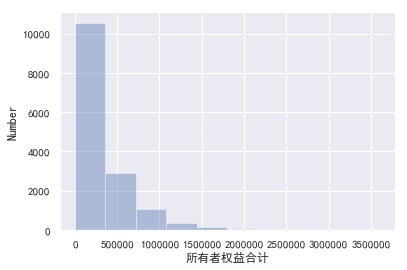

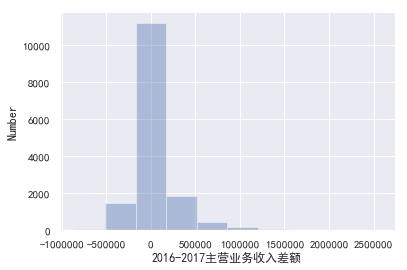

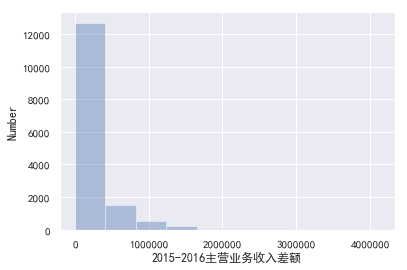

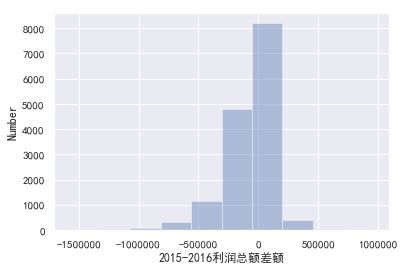

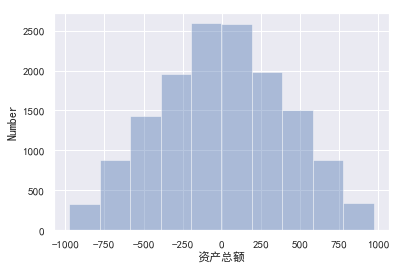

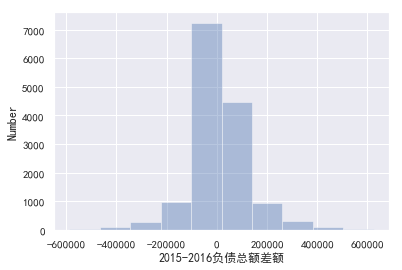

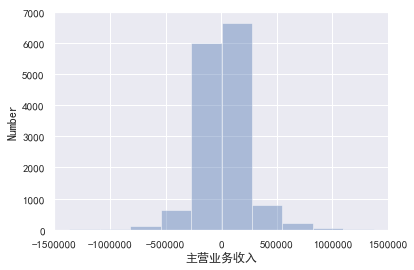

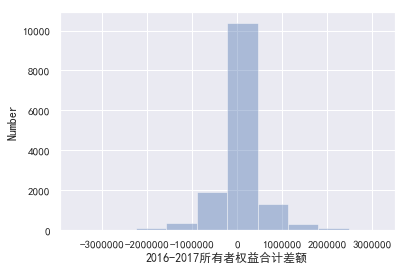

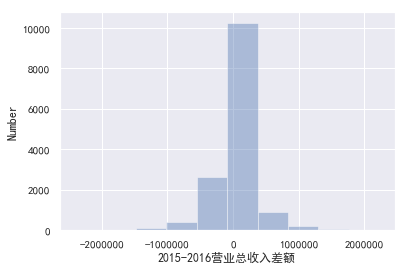

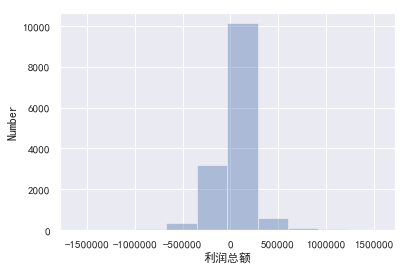

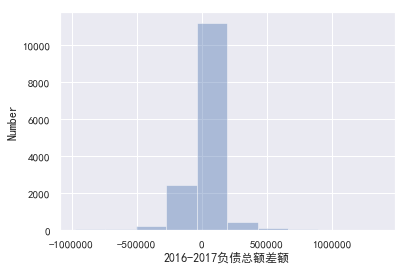

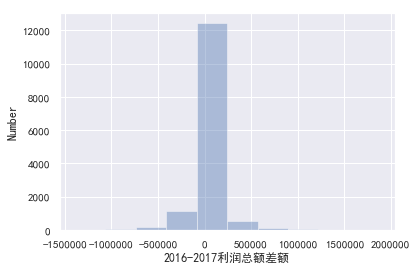

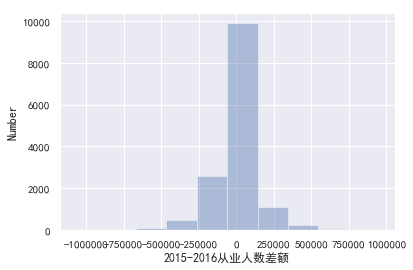

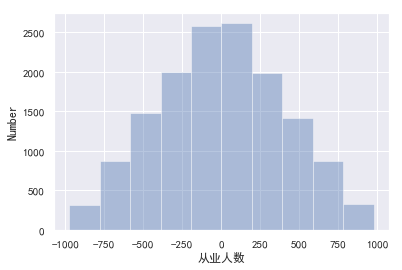

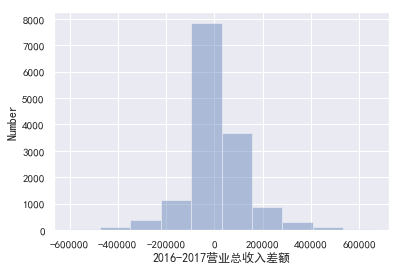

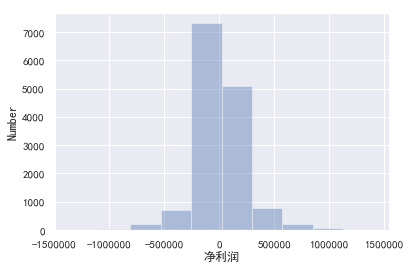

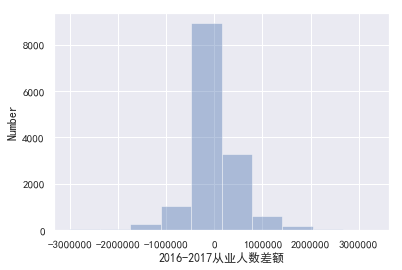

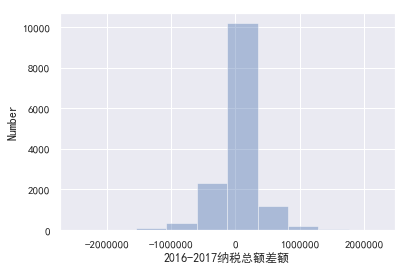

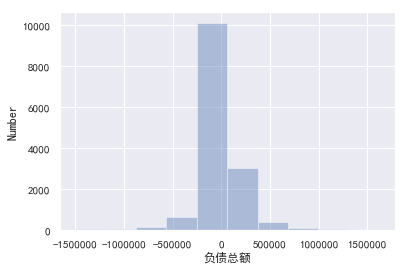

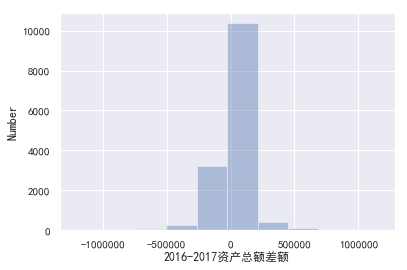

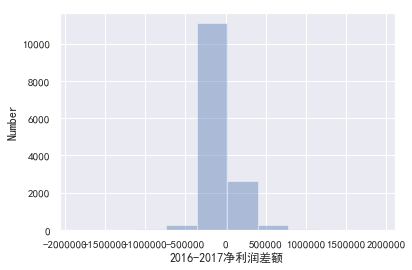

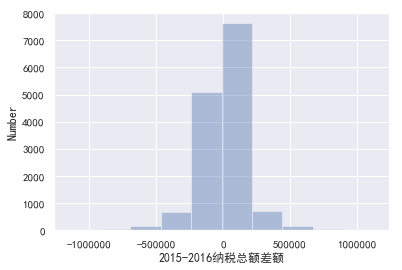

In [94]:
# 所有数据
drawDistplot_ID_diff_value(year_report_train_ID_diff_value,'ID')

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


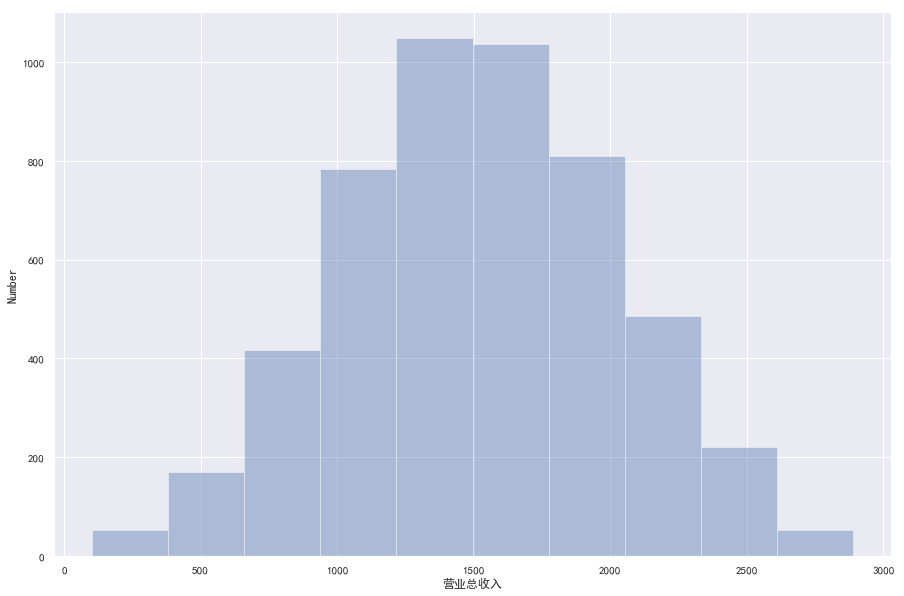

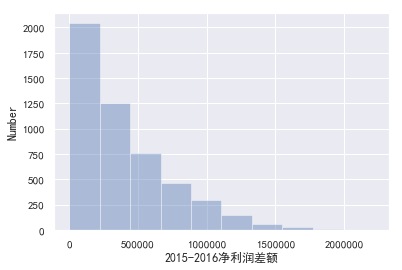

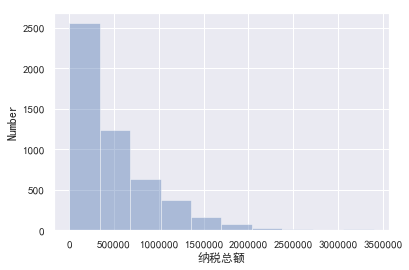

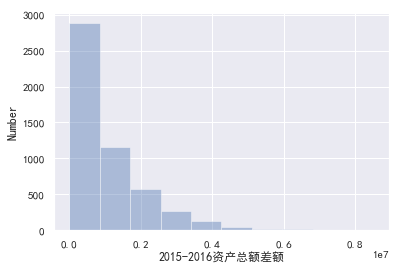

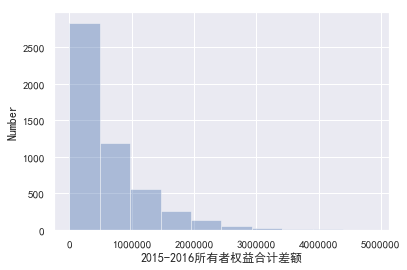

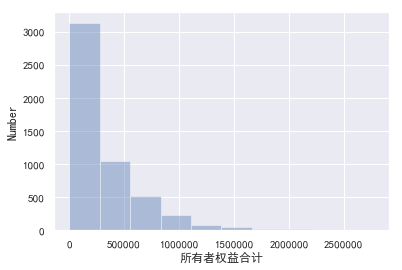

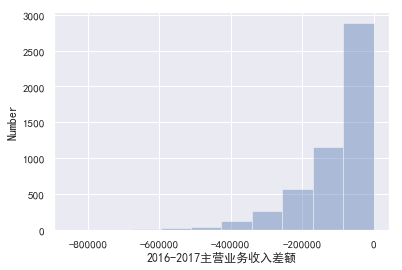

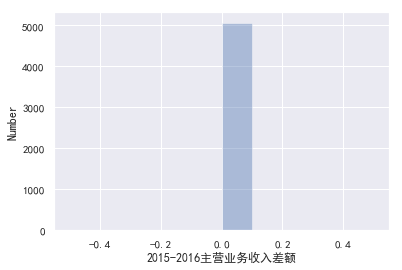

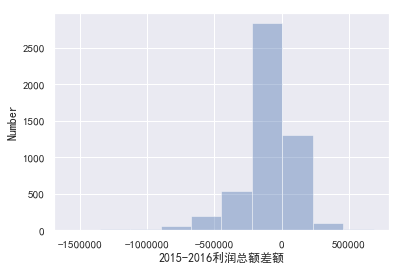

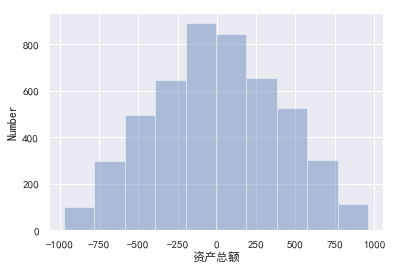

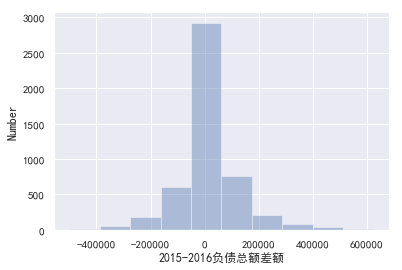

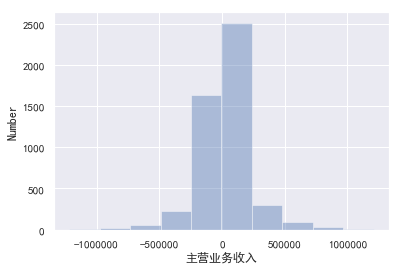

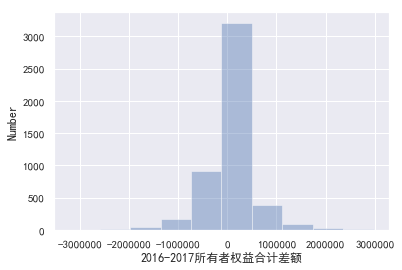

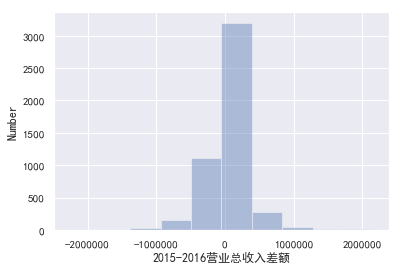

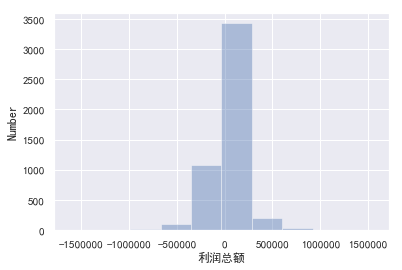

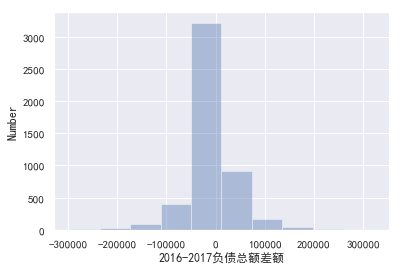

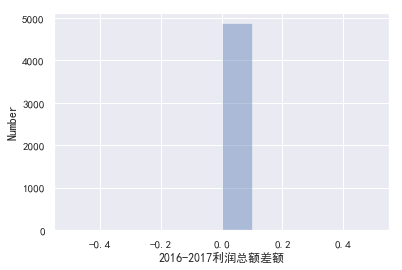

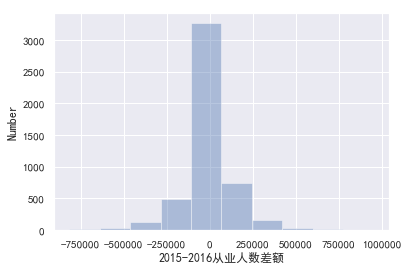

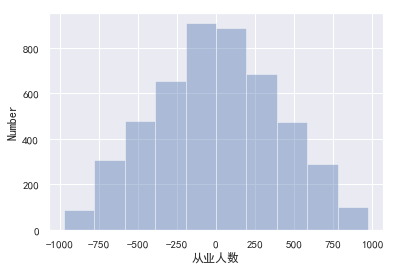

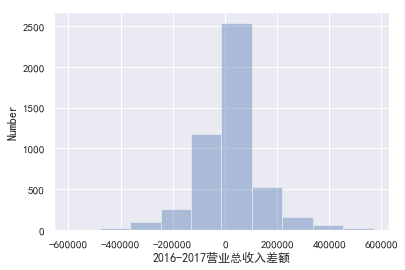

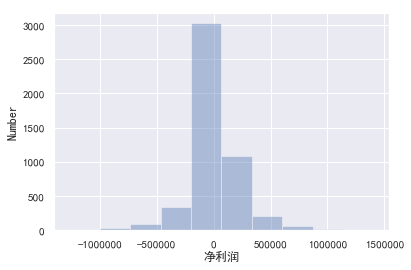

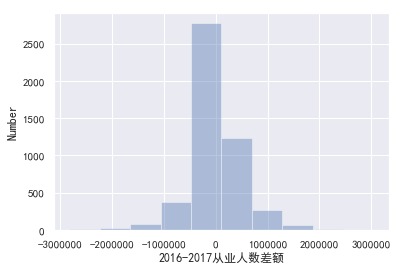

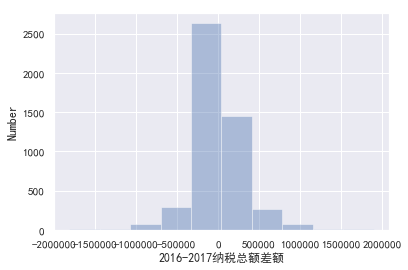

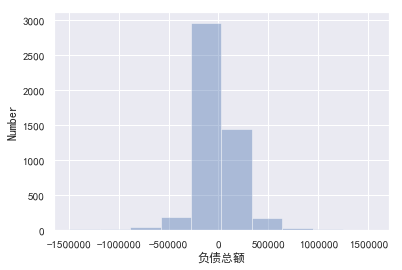

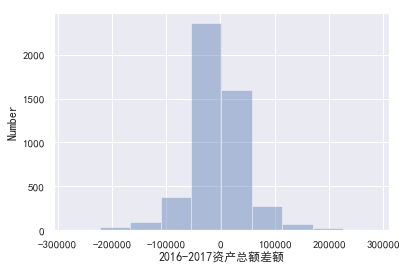

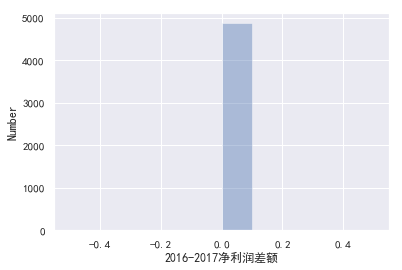

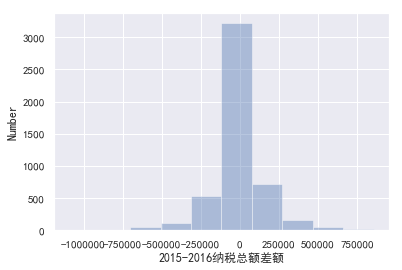

In [95]:
# 有标签数据
drawDistplot_ID_diff_value(year_report_train_ID_diff_value_label,'ID')

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\anaconda\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


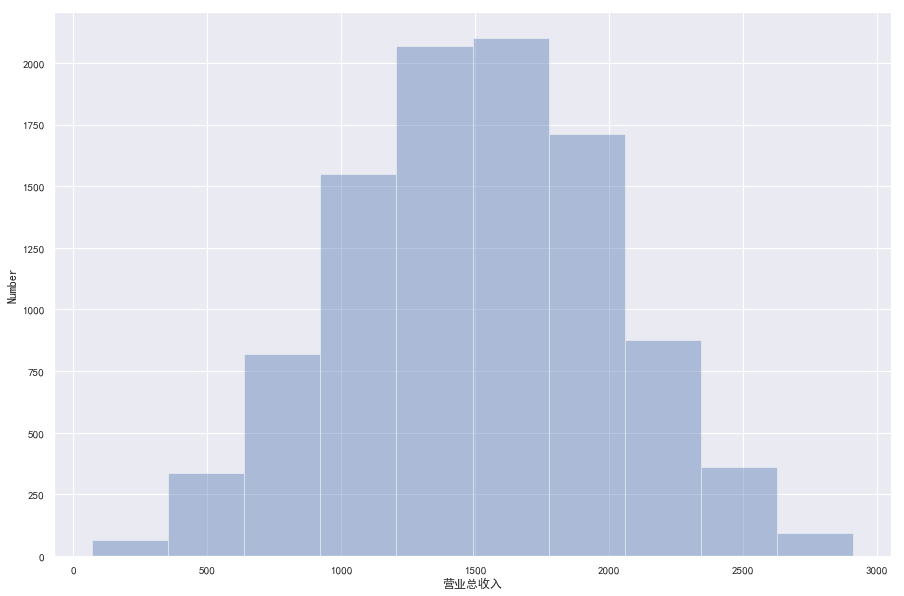

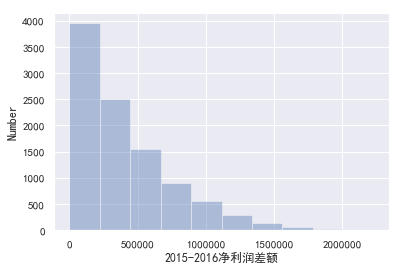

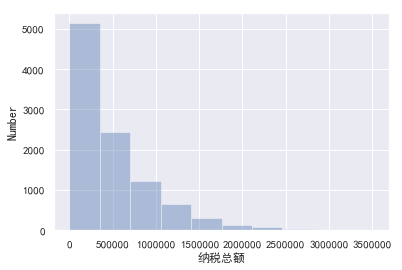

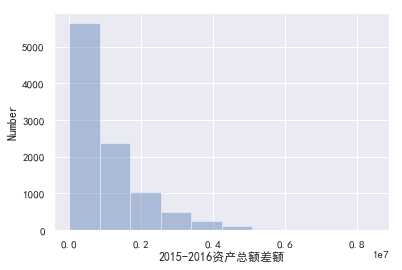

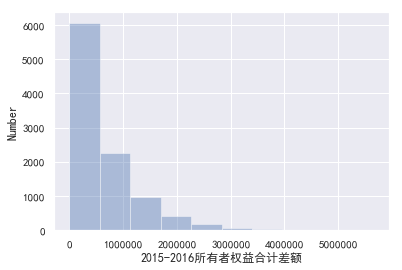

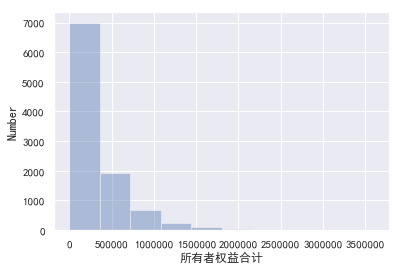

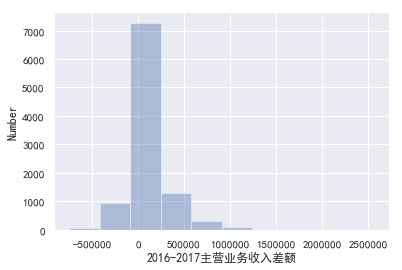

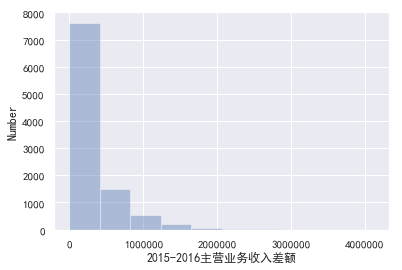

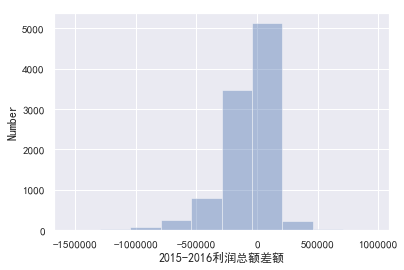

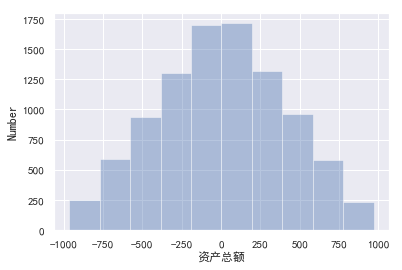

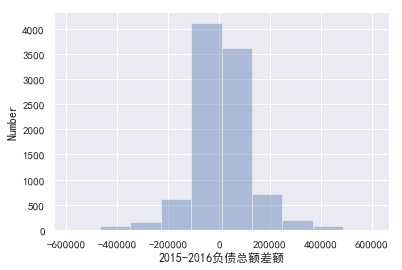

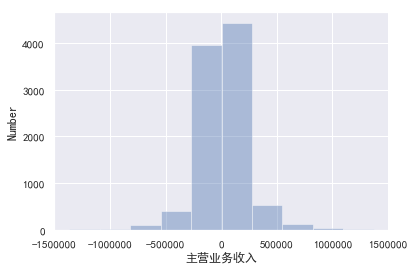

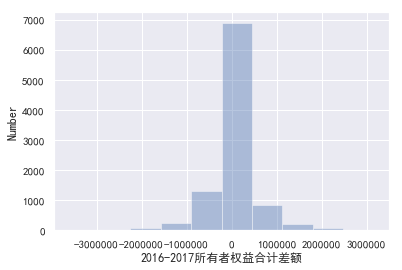

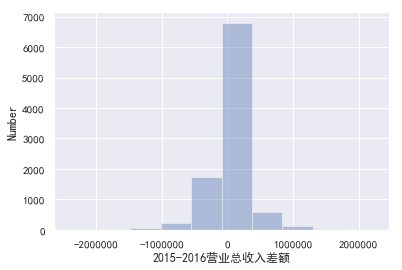

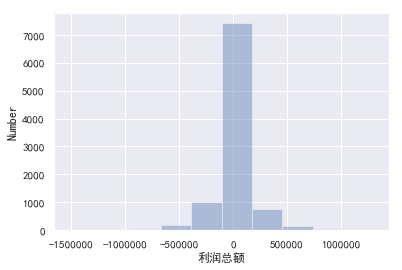

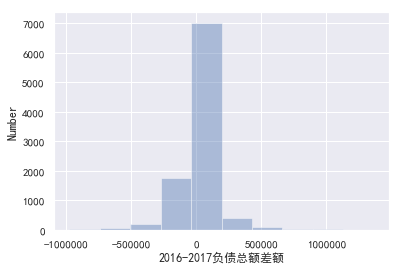

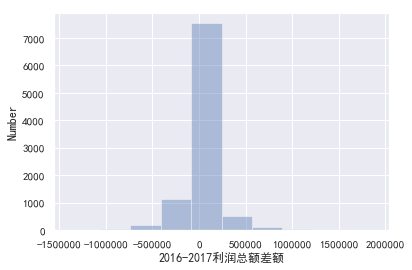

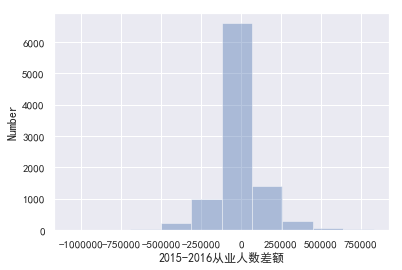

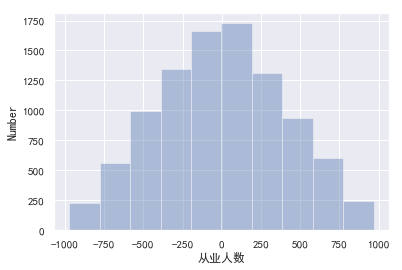

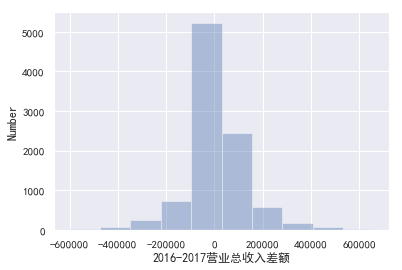

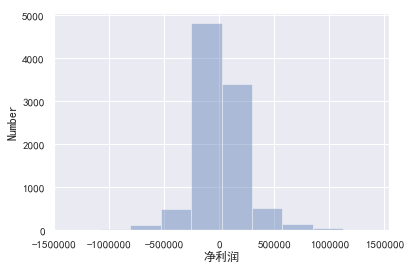

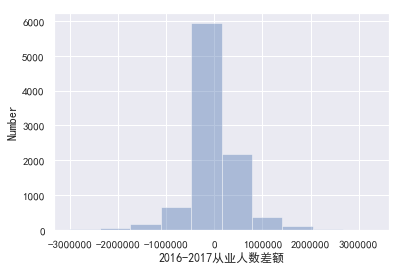

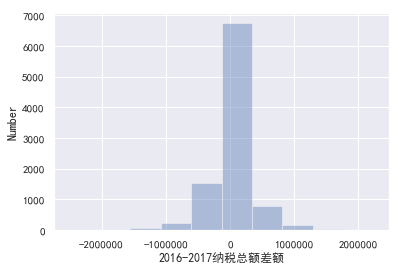

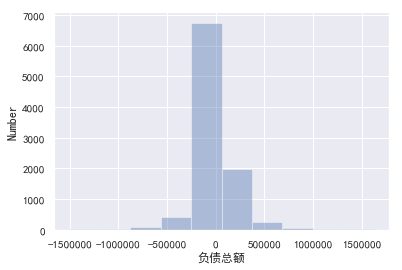

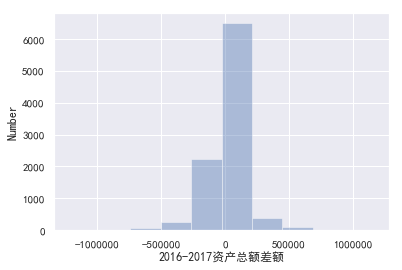

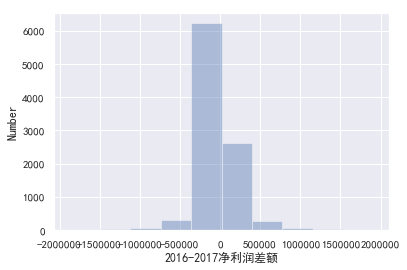

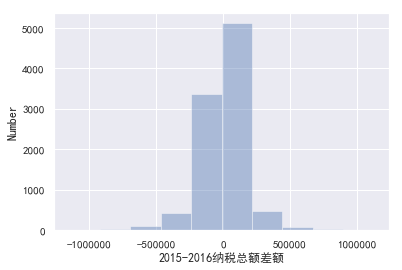

In [96]:
# 无标签数据
drawDistplot_ID_diff_value(year_report_train_ID_diff_value_nolabel,'ID')

In [97]:
year_report_train_ID_diff_value.describe()

,ID,从业人数,资产总额,负债总额,营业总收入,主营业务收入,利润总额,净利润,纳税总额,所有者权益合计,...,2015-2016所有者权益合计差额,2016-2017从业人数差额,2016-2017资产总额差额,2016-2017负债总额差额,2016-2017营业总收入差额,2016-2017主营业务收入差额,2016-2017利润总额差额,2016-2017净利润差额,2016-2017纳税总额差额,2016-2017所有者权益合计差额
count,1.504900e+04,15049.000000,1.504900e+04,1.504900e+04,1.504900e+04,1.504900e+04,1.504900e+04,1.504900e+04,1.504900e+04,1.504900e+04,...,1.448900e+04,14464.000000,14430.000000,1.444900e+04,1.442600e+04,1.443100e+04,1.444600e+04,1.444100e+04,1.447200e+04,1.446600e+04
mean,3.527764e+06,1511.642169,4.029606e+05,4.840940e+05,1.031772e+06,6.166800e+05,3.089790e+05,3.395913e+04,1.842883e+05,-8.120337e+04,...,-4.019473e+03,0.316856,14265.811504,1.862807e+04,2.765608e+04,1.784953e+04,7.401132e+03,6.646318e+02,4.730202e+03,-3.877722e+03
std,2.622237e+06,494.053654,3.523120e+05,4.666730e+05,1.024658e+06,6.248520e+05,3.349976e+05,2.190693e+05,3.373915e+05,1.952146e+05,...,1.423530e+05,402.013061,119780.096979,2.180371e+05,5.032088e+05,3.191810e+05,1.906655e+05,1.212253e+05,1.808248e+05,1.592259e+05
min,2.800000e+01,70.000000,8.800000e+02,6.050000e+02,2.156000e+03,1.440000e+03,2.450000e+02,-8.520235e+05,0.000000e+00,-1.577940e+06,...,-1.075235e+06,-974.000000,-601020.000000,-1.364255e+06,-3.015536e+06,-2.499784e+06,-1.504272e+06,-1.218918e+06,-1.876455e+06,-1.146080e+06
25%,8.035730e+05,1169.000000,1.325500e+05,1.388400e+05,2.882880e+05,1.685610e+05,7.867440e+04,-6.791130e+04,0.000000e+00,-1.386200e+05,...,-4.845000e+04,-289.000000,-31752.500000,-5.146000e+04,-1.354165e+05,-8.209260e+04,-4.265630e+04,-2.633040e+04,-5.580000e+02,-5.600125e+04
50%,5.970481e+06,1512.000000,3.001500e+05,3.361450e+05,7.003500e+05,4.130394e+05,1.972992e+05,-4.368000e+03,1.571680e+04,-3.078000e+04,...,0.000000e+00,1.000000,8760.000000,7.680000e+03,1.039000e+04,5.694000e+03,2.340000e+03,-1.924000e+02,0.000000e+00,0.000000e+00
75%,5.974259e+06,1858.000000,5.806500e+05,6.857550e+05,1.441716e+06,8.554428e+05,4.219408e+05,8.738270e+04,2.247168e+05,1.164000e+04,...,4.215000e+04,287.250000,57522.500000,8.521500e+04,1.917200e+05,1.171908e+05,5.780888e+04,2.613510e+04,4.622400e+03,5.023625e+04
max,5.978033e+06,2912.000000,2.229750e+06,3.517500e+06,8.520235e+06,5.660507e+06,3.600663e+06,2.564860e+06,4.125728e+06,9.641800e+05,...,9.535500e+05,977.000000,661020.000000,1.406300e+06,3.315918e+06,2.240091e+06,1.624503e+06,1.164000e+06,1.915920e+06,1.124785e+06
